In [35]:
# Librerias generales
import pandas as pd
import numpy as np
import re
# Librerias e visualización
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# Lectura de base de datos
df_filtrado = pd.read_csv('DBs\df_filtrado.csv')
df_filtrado.drop('Unnamed: 0', axis=1, inplace=True)
df_filtrado

servicio_habilitado  nrodoc             servicio_admite via_ingreso  \
0           General adultos  309135             Hospitalizacion    Remitido   
1           General adultos  307903             Hospitalizacion    Remitido   
2           General adultos  312102  Urgencias Generales Piso 1   Urgencias   
3           General adultos  309271  Urgencias Generales Sotano   Urgencias   
4           General adultos  308390  Urgencias Generales Sotano   Urgencias   
...                     ...     ...                         ...         ...   
1490        General adultos  313023  Urgencias Generales Sotano   Urgencias   
1491  Urgencias >= 24 horas  306992  Urgencias Generales Sotano   Urgencias   
1492        General adultos  310672  Urgencias Generales Sotano   Urgencias   
1493        General adultos  306990  Urgencias Generales Sotano   Urgencias   
1494  Urgencias >= 24 horas  307974  Urgencias Generales Sotano   Urgencias   

           unidad_estrategica  tipo_egreso transfusion_sangre antibiotico  \
0     Hospitalizacion Adultos  Alta Medica                 No          No   
1     Hospitalizacion Adultos  Alta Medica                 No          No   
2     Hospitalizacion Adultos  Alta Medica                 No          No   
3     Hospitalizacion Adultos  Alta Medica                 No          No   
4     Hospitalizacion Adultos  Alta Medica                 No          Si   
...                       ...          ...                ...         ...   
1490  Hospitalizacion Adultos  Alta Medica                 No          Si   
1491                Urgencias  Alta Medica                 No          No   
1492  Hospitalizacion Adultos  Alta Medica                 No          No   
1493  Hospitalizacion Adultos  Alta Medica                 No          No   
1494                Urgencias  Alta Medica                 No          No   

     alta_medica     posible_alta  ... ulcera_de_pie_diabetico  remision  \
0             Si  Sin Informacion  ...                      No  Grupal 2   
1             Si  Sin Informacion  ...                      No  Grupal 2   
2             Si  Sin Informacion  ...                      No  Grupal 2   
3             Si  Sin Informacion  ...                      No  Grupal 4   
4             Si  Sin Informacion  ...                      No  Grupal 4   
...          ...              ...  ...                     ...       ...   
1490          Si  Sin Informacion  ...                      No  Grupal 2   
1491          Si  Sin Informacion  ...                      No  Grupal 4   
1492          Si  Sin Informacion  ...                      No  Grupal 2   
1493          Si  Sin Informacion  ...                      No  Grupal 4   
1494          Si  Sin Informacion  ...                      No  Grupal 4   

     tiene_proximo_control    tipo_control  requiere_cita_de_morbilidad  \
0                       Si          Medico                           No   
1                       Si          Medico                           No   
2                       ND  Sin clasificar                           ND   
3                       Si          Medico                           Si   
4                       ND  Sin clasificar                           ND   
...                    ...             ...                          ...   
1490                    Si          Medico                           No   
1491                    ND  Sin clasificar                           ND   
1492                    ND  Sin clasificar                           ND   
1493                    ND  Sin clasificar                           ND   
1494                    ND  Sin clasificar                           ND   

      ambito_segun_el_medico  numero_diagnosticos sexo  edad  ciclo_vital  
0                Ambulatorio                    3    F  81.0        Vejez  
1                Ambulatorio                    1    F  89.0        Vejez  
2                Ambulatorio                    0    F  82.0        Vejez  
3               

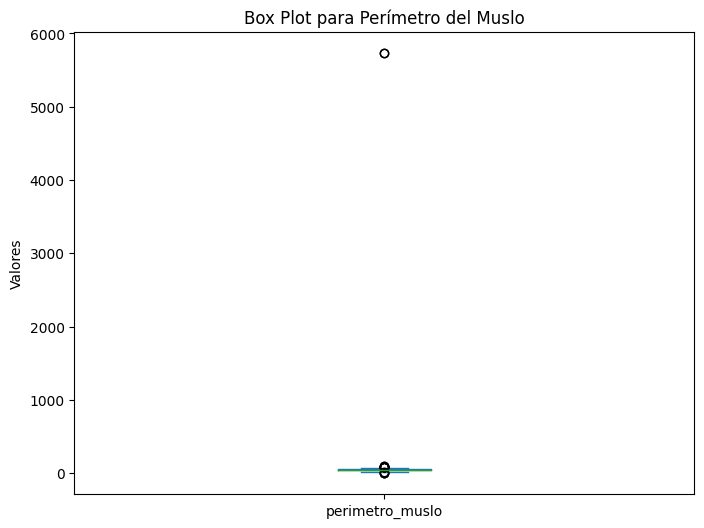

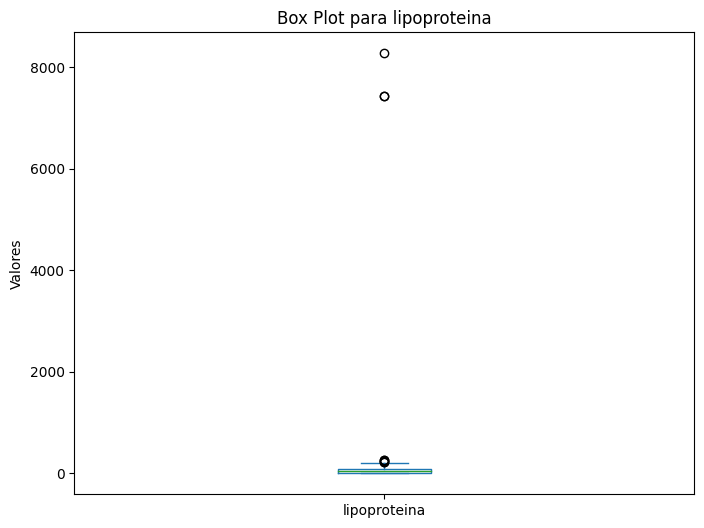

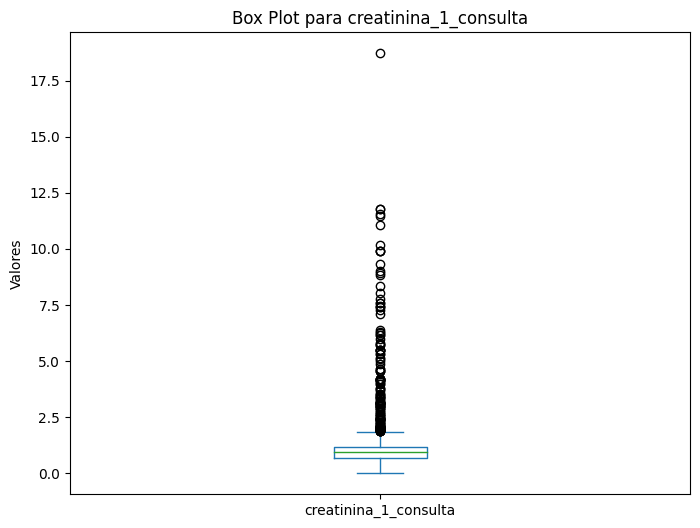

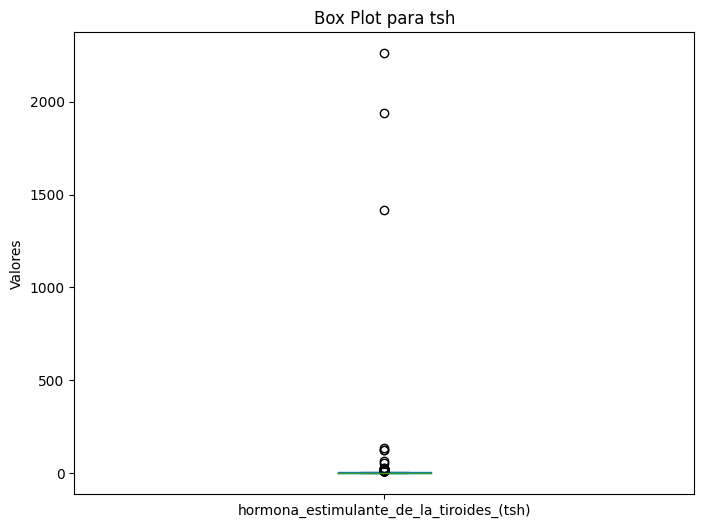

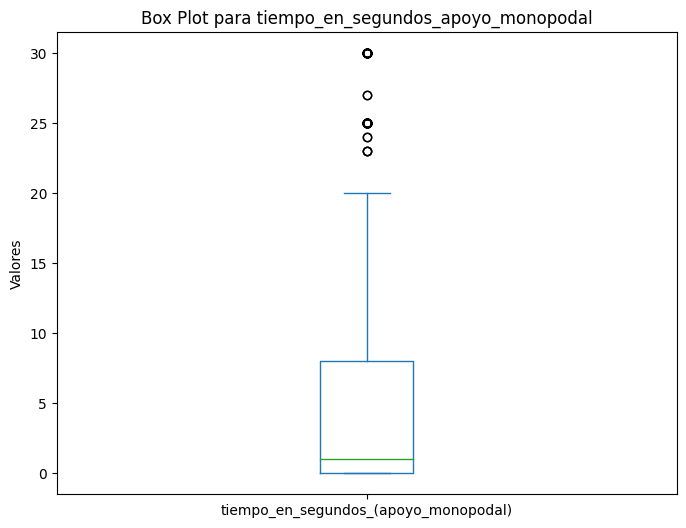

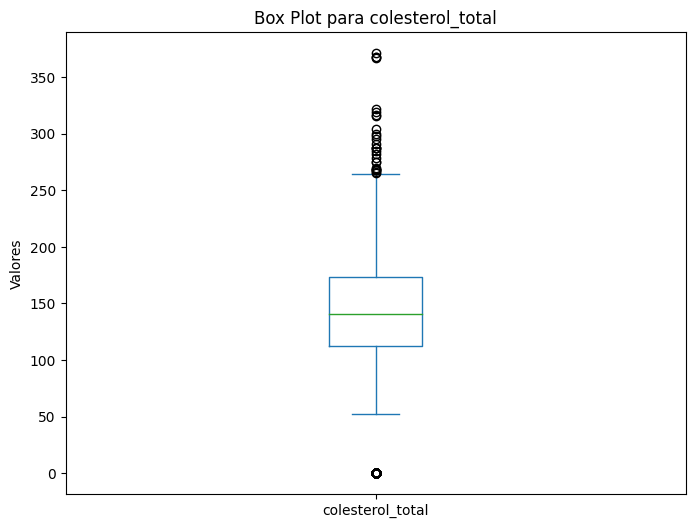

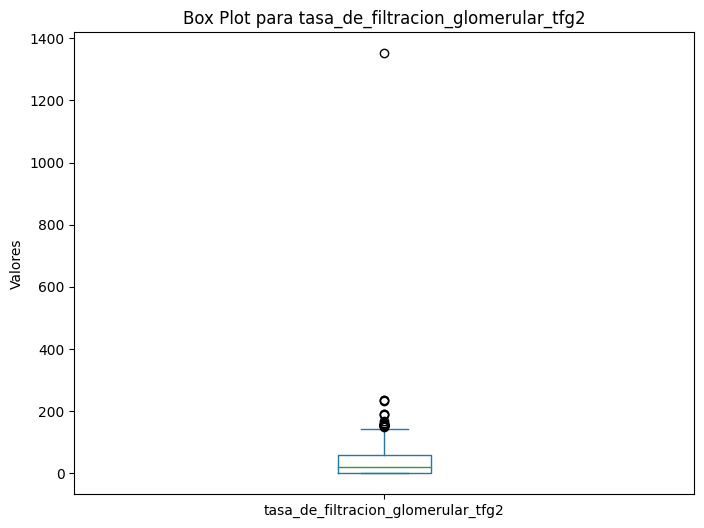

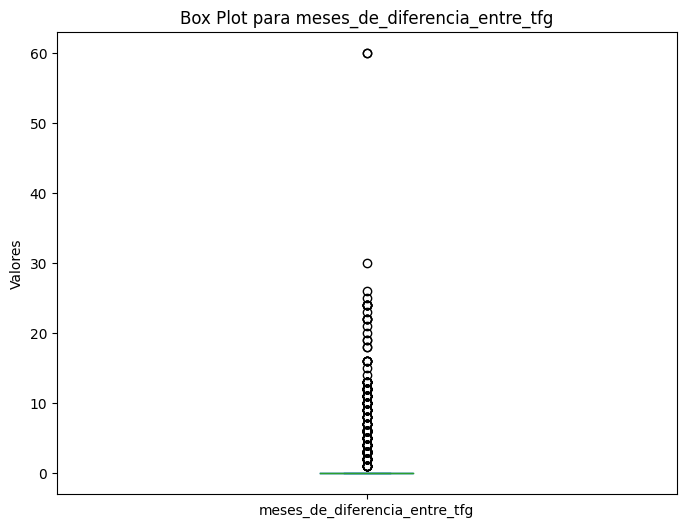

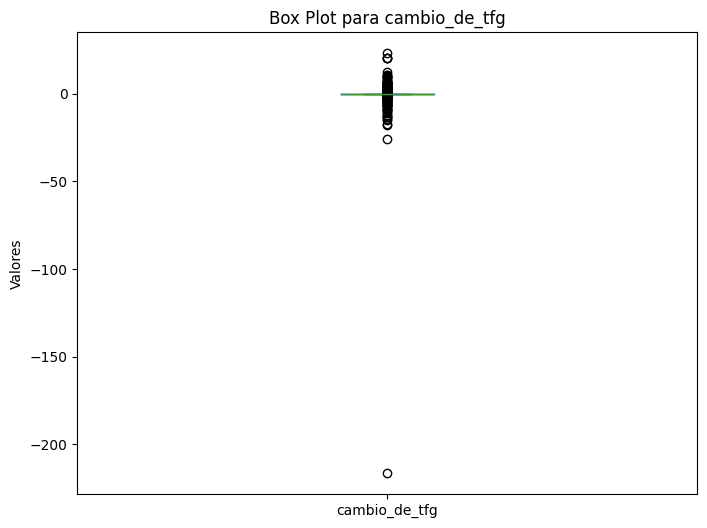

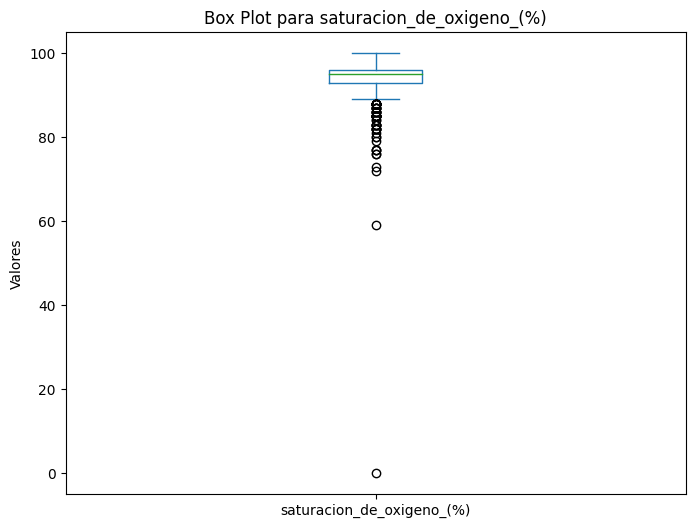

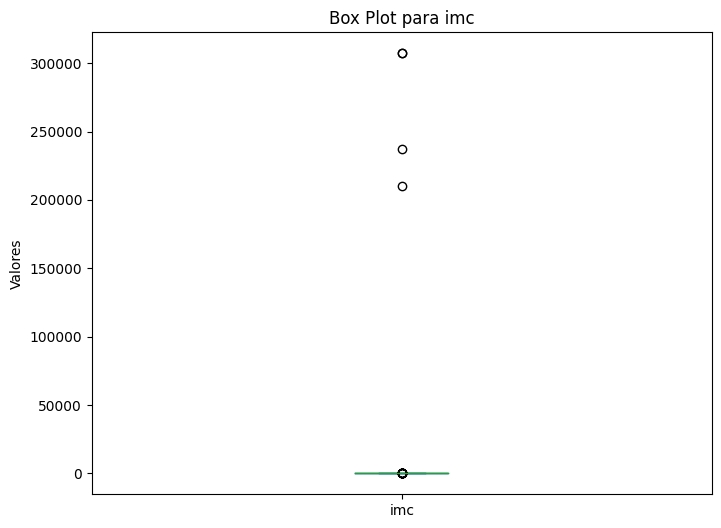

In [37]:
# Gráficos de BOX-PLOT para algunas variables numéricas (Con datos atipicos)

df_filtrado['perimetro_muslo'].plot.box(figsize=(8, 6))
plt.title('Box Plot para Perímetro del Muslo')
plt.ylabel('Valores')
plt.show()

df_filtrado['lipoproteina' ].plot.box(figsize=(8, 6))
plt.title('Box Plot para lipoproteina')
plt.ylabel('Valores')
plt.show()

df_filtrado['creatinina_1_consulta' ].plot.box(figsize=(8, 6))
plt.title('Box Plot para creatinina_1_consulta')
plt.ylabel('Valores')
plt.show()

df_filtrado['hormona_estimulante_de_la_tiroides_(tsh)' ].plot.box(figsize=(8, 6))
plt.title('Box Plot para tsh')
plt.ylabel('Valores')
plt.show()

df_filtrado['tiempo_en_segundos_(apoyo_monopodal)' ].plot.box(figsize=(8, 6))
plt.title('Box Plot para tiempo_en_segundos_apoyo_monopodal')
plt.ylabel('Valores')
plt.show()

df_filtrado['colesterol_total' ].plot.box(figsize=(8, 6))
plt.title('Box Plot para colesterol_total')
plt.ylabel('Valores')
plt.show()

df_filtrado['tasa_de_filtracion_glomerular_tfg2' ].plot.box(figsize=(8, 6))
plt.title('Box Plot para tasa_de_filtracion_glomerular_tfg2')
plt.ylabel('Valores')
plt.show()

df_filtrado['meses_de_diferencia_entre_tfg' ].plot.box(figsize=(8, 6))
plt.title('Box Plot para meses_de_diferencia_entre_tfg')
plt.ylabel('Valores')
plt.show()

df_filtrado['cambio_de_tfg' ].plot.box(figsize=(8, 6))
plt.title('Box Plot para cambio_de_tfg')
plt.ylabel('Valores')
plt.show()


df_filtrado['saturacion_de_oxigeno_(%)' ].plot.box(figsize=(8, 6))
plt.title('Box Plot para saturacion_de_oxigeno_(%)')
plt.ylabel('Valores')
plt.show()

df_filtrado['imc' ].plot.box(figsize=(8, 6))
plt.title('Box Plot para imc')
plt.ylabel('Valores')
plt.show()

Se ha tomado la decisión de eliminar los valores atípicos de las siguientes variables, ya que podrían introducir ruido en el modelo y afectar la calidad de los resultados. La eliminación de estos valores atípicos contribuirá a un análisis más robusto y preciso.

In [38]:
# Eliminar datos atipicos
df_filtrado = df_filtrado[df_filtrado['perimetro_muslo'] < 5000]
df_filtrado = df_filtrado[df_filtrado['lipoproteina'] < 6000]
df_filtrado = df_filtrado[df_filtrado['creatinina_1_consulta'] < 15]
df_filtrado = df_filtrado[df_filtrado['hormona_estimulante_de_la_tiroides_(tsh)'] < 40]
df_filtrado = df_filtrado[df_filtrado['tiempo_en_segundos_(apoyo_monopodal)'] < 80]
df_filtrado = df_filtrado[df_filtrado['colesterol_total'] < 1300]
df_filtrado = df_filtrado[df_filtrado['tasa_de_filtracion_glomerular_tfg2'] < 500]
df_filtrado = df_filtrado[df_filtrado['meses_de_diferencia_entre_tfg'] < 50]
df_filtrado = df_filtrado[df_filtrado['cambio_de_tfg'] < 100]

df_filtrado = df_filtrado[df_filtrado['saturacion_de_oxigeno_(%)'] > 1]
df_filtrado = df_filtrado[df_filtrado['imc'] < 150000]

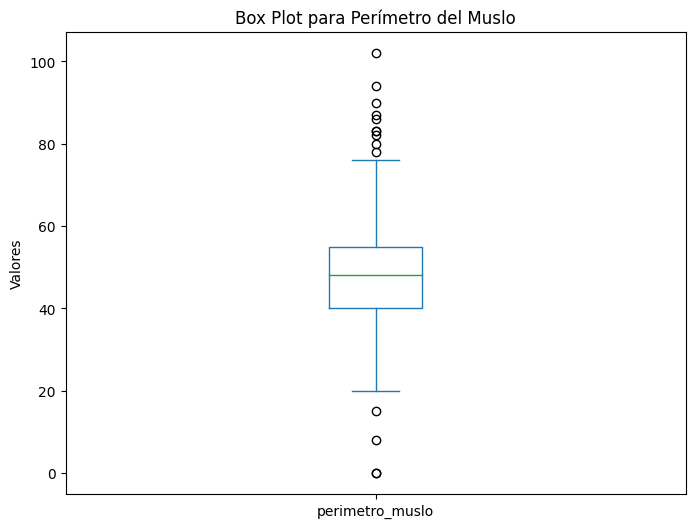

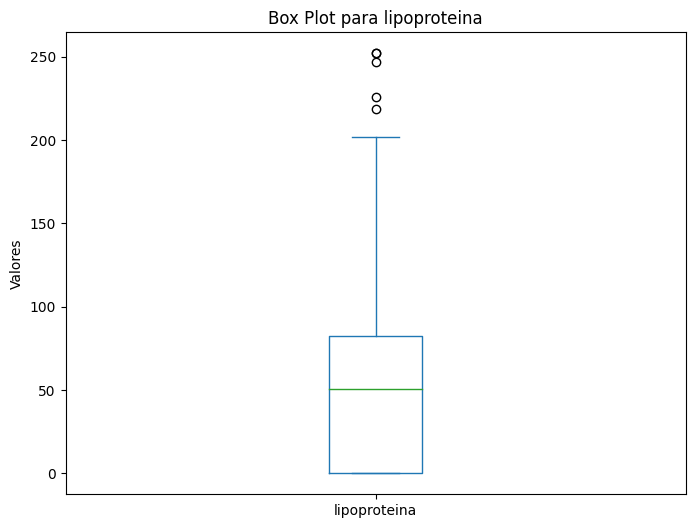

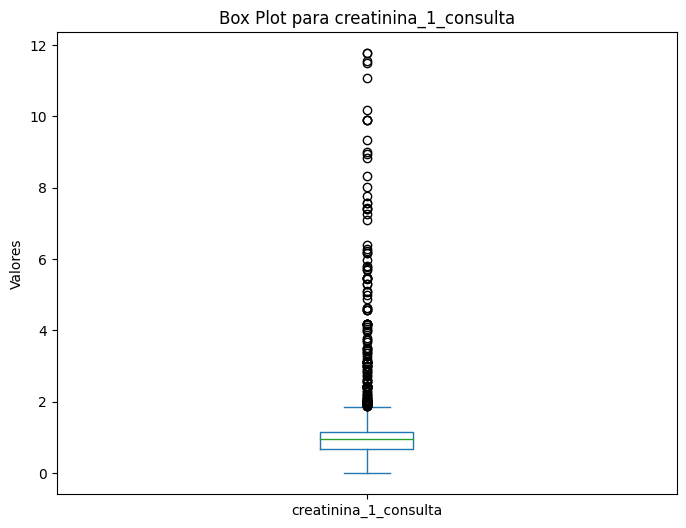

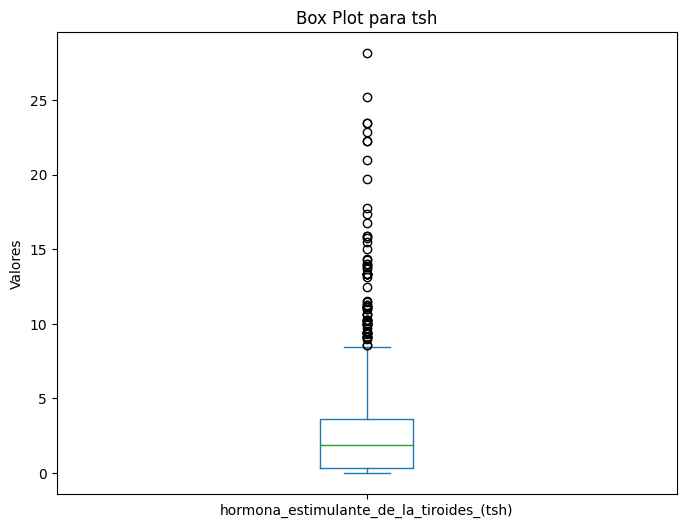

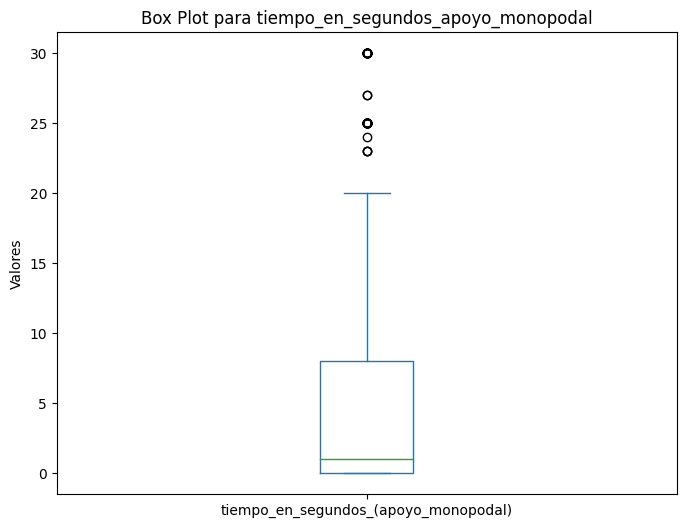

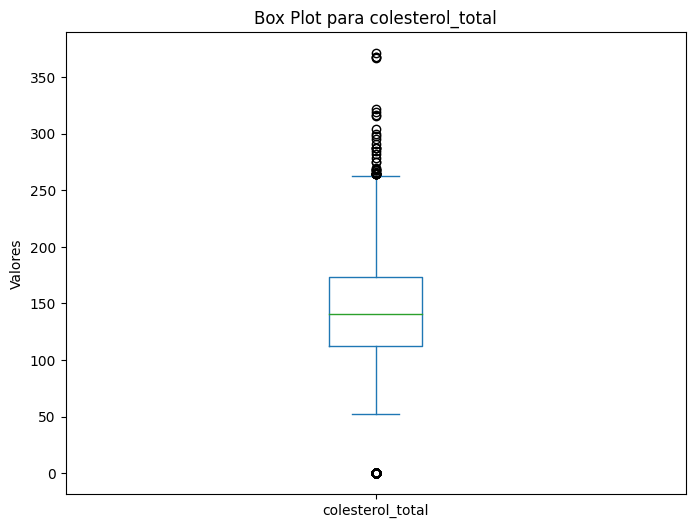

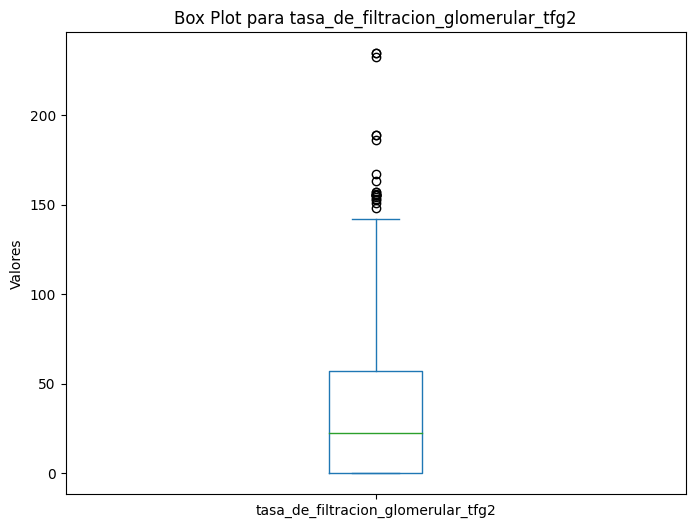

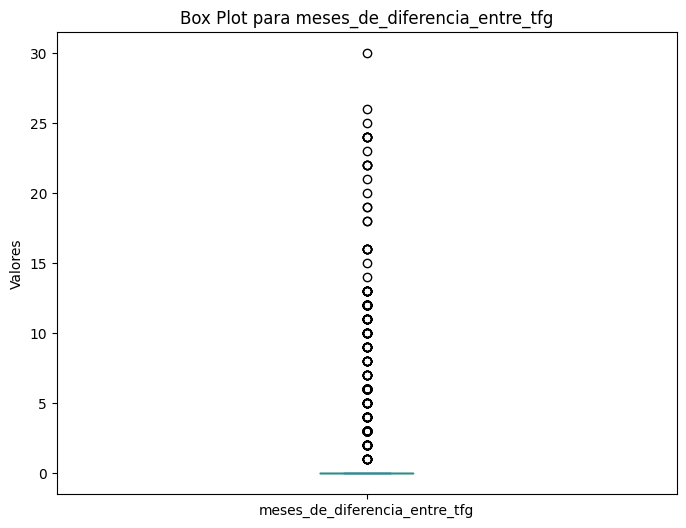

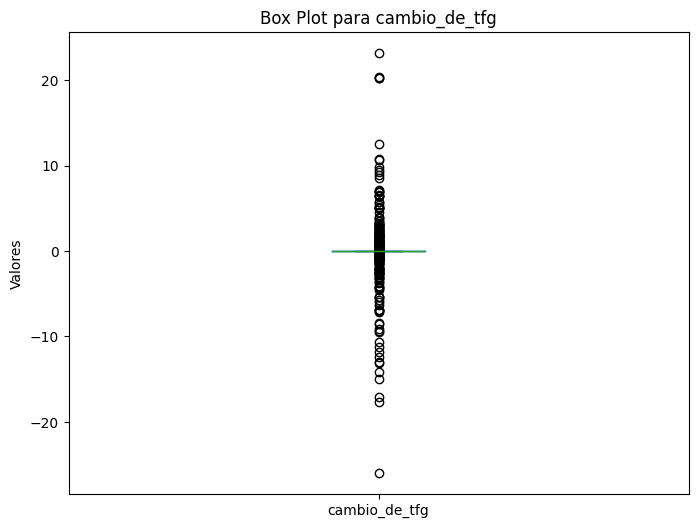

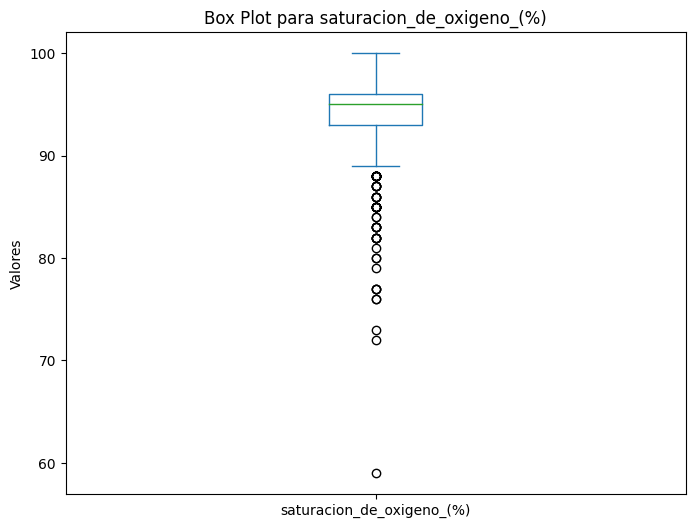

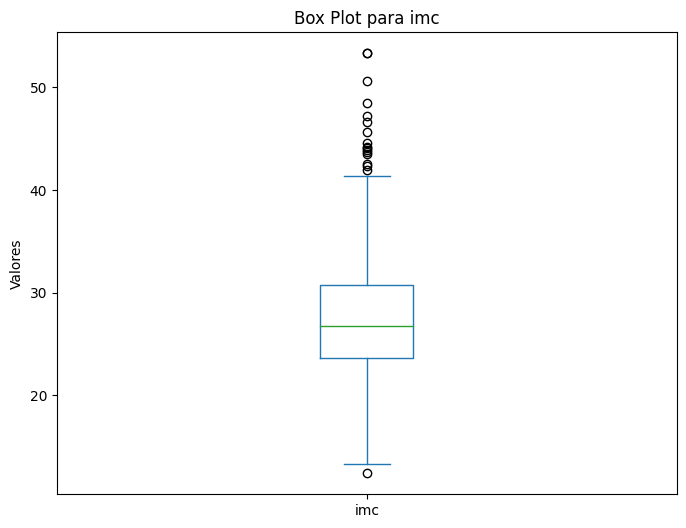

In [39]:
# Gráficos BOX-PLOT para algunas variables numéricas (Sin datos atipicos)

df_filtrado['perimetro_muslo'].plot.box(figsize=(8, 6))
plt.title('Box Plot para Perímetro del Muslo')
plt.ylabel('Valores')
plt.show()

df_filtrado['lipoproteina' ].plot.box(figsize=(8, 6))
plt.title('Box Plot para lipoproteina')
plt.ylabel('Valores')
plt.show()

df_filtrado['creatinina_1_consulta' ].plot.box(figsize=(8, 6))
plt.title('Box Plot para creatinina_1_consulta')
plt.ylabel('Valores')
plt.show()

df_filtrado['hormona_estimulante_de_la_tiroides_(tsh)' ].plot.box(figsize=(8, 6))
plt.title('Box Plot para tsh')
plt.ylabel('Valores')
plt.show()

df_filtrado['tiempo_en_segundos_(apoyo_monopodal)' ].plot.box(figsize=(8, 6))
plt.title('Box Plot para tiempo_en_segundos_apoyo_monopodal')
plt.ylabel('Valores')
plt.show()

df_filtrado['colesterol_total' ].plot.box(figsize=(8, 6))
plt.title('Box Plot para colesterol_total')
plt.ylabel('Valores')
plt.show()

df_filtrado['tasa_de_filtracion_glomerular_tfg2' ].plot.box(figsize=(8, 6))
plt.title('Box Plot para tasa_de_filtracion_glomerular_tfg2')
plt.ylabel('Valores')
plt.show()

df_filtrado['meses_de_diferencia_entre_tfg' ].plot.box(figsize=(8, 6))
plt.title('Box Plot para meses_de_diferencia_entre_tfg')
plt.ylabel('Valores')
plt.show()

df_filtrado['cambio_de_tfg' ].plot.box(figsize=(8, 6))
plt.title('Box Plot para cambio_de_tfg')
plt.ylabel('Valores')
plt.show()

df_filtrado['saturacion_de_oxigeno_(%)' ].plot.box(figsize=(8, 6))
plt.title('Box Plot para saturacion_de_oxigeno_(%)')
plt.ylabel('Valores')
plt.show()

df_filtrado['imc' ].plot.box(figsize=(8, 6))
plt.title('Box Plot para imc')
plt.ylabel('Valores')
plt.show()

In [40]:
# Se convierte esta a variable a str
df_filtrado['auto-calificacion_nivel_de_ejercicio']=df_filtrado['auto-calificacion_nivel_de_ejercicio'].astype(str)

In [41]:
# Se separan las variables categoricas
categoricas= df_filtrado.select_dtypes(include=['object'])

In [42]:
columnas_a_eliminar = df_filtrado.columns.intersection(categoricas.columns)

# Eliminar las columnas en categóricas que también están en numéricas
numericas = df_filtrado.drop(columns=columnas_a_eliminar)

numericas.drop(['nrodoc','tiempo_estancia'],axis=1,inplace=True)

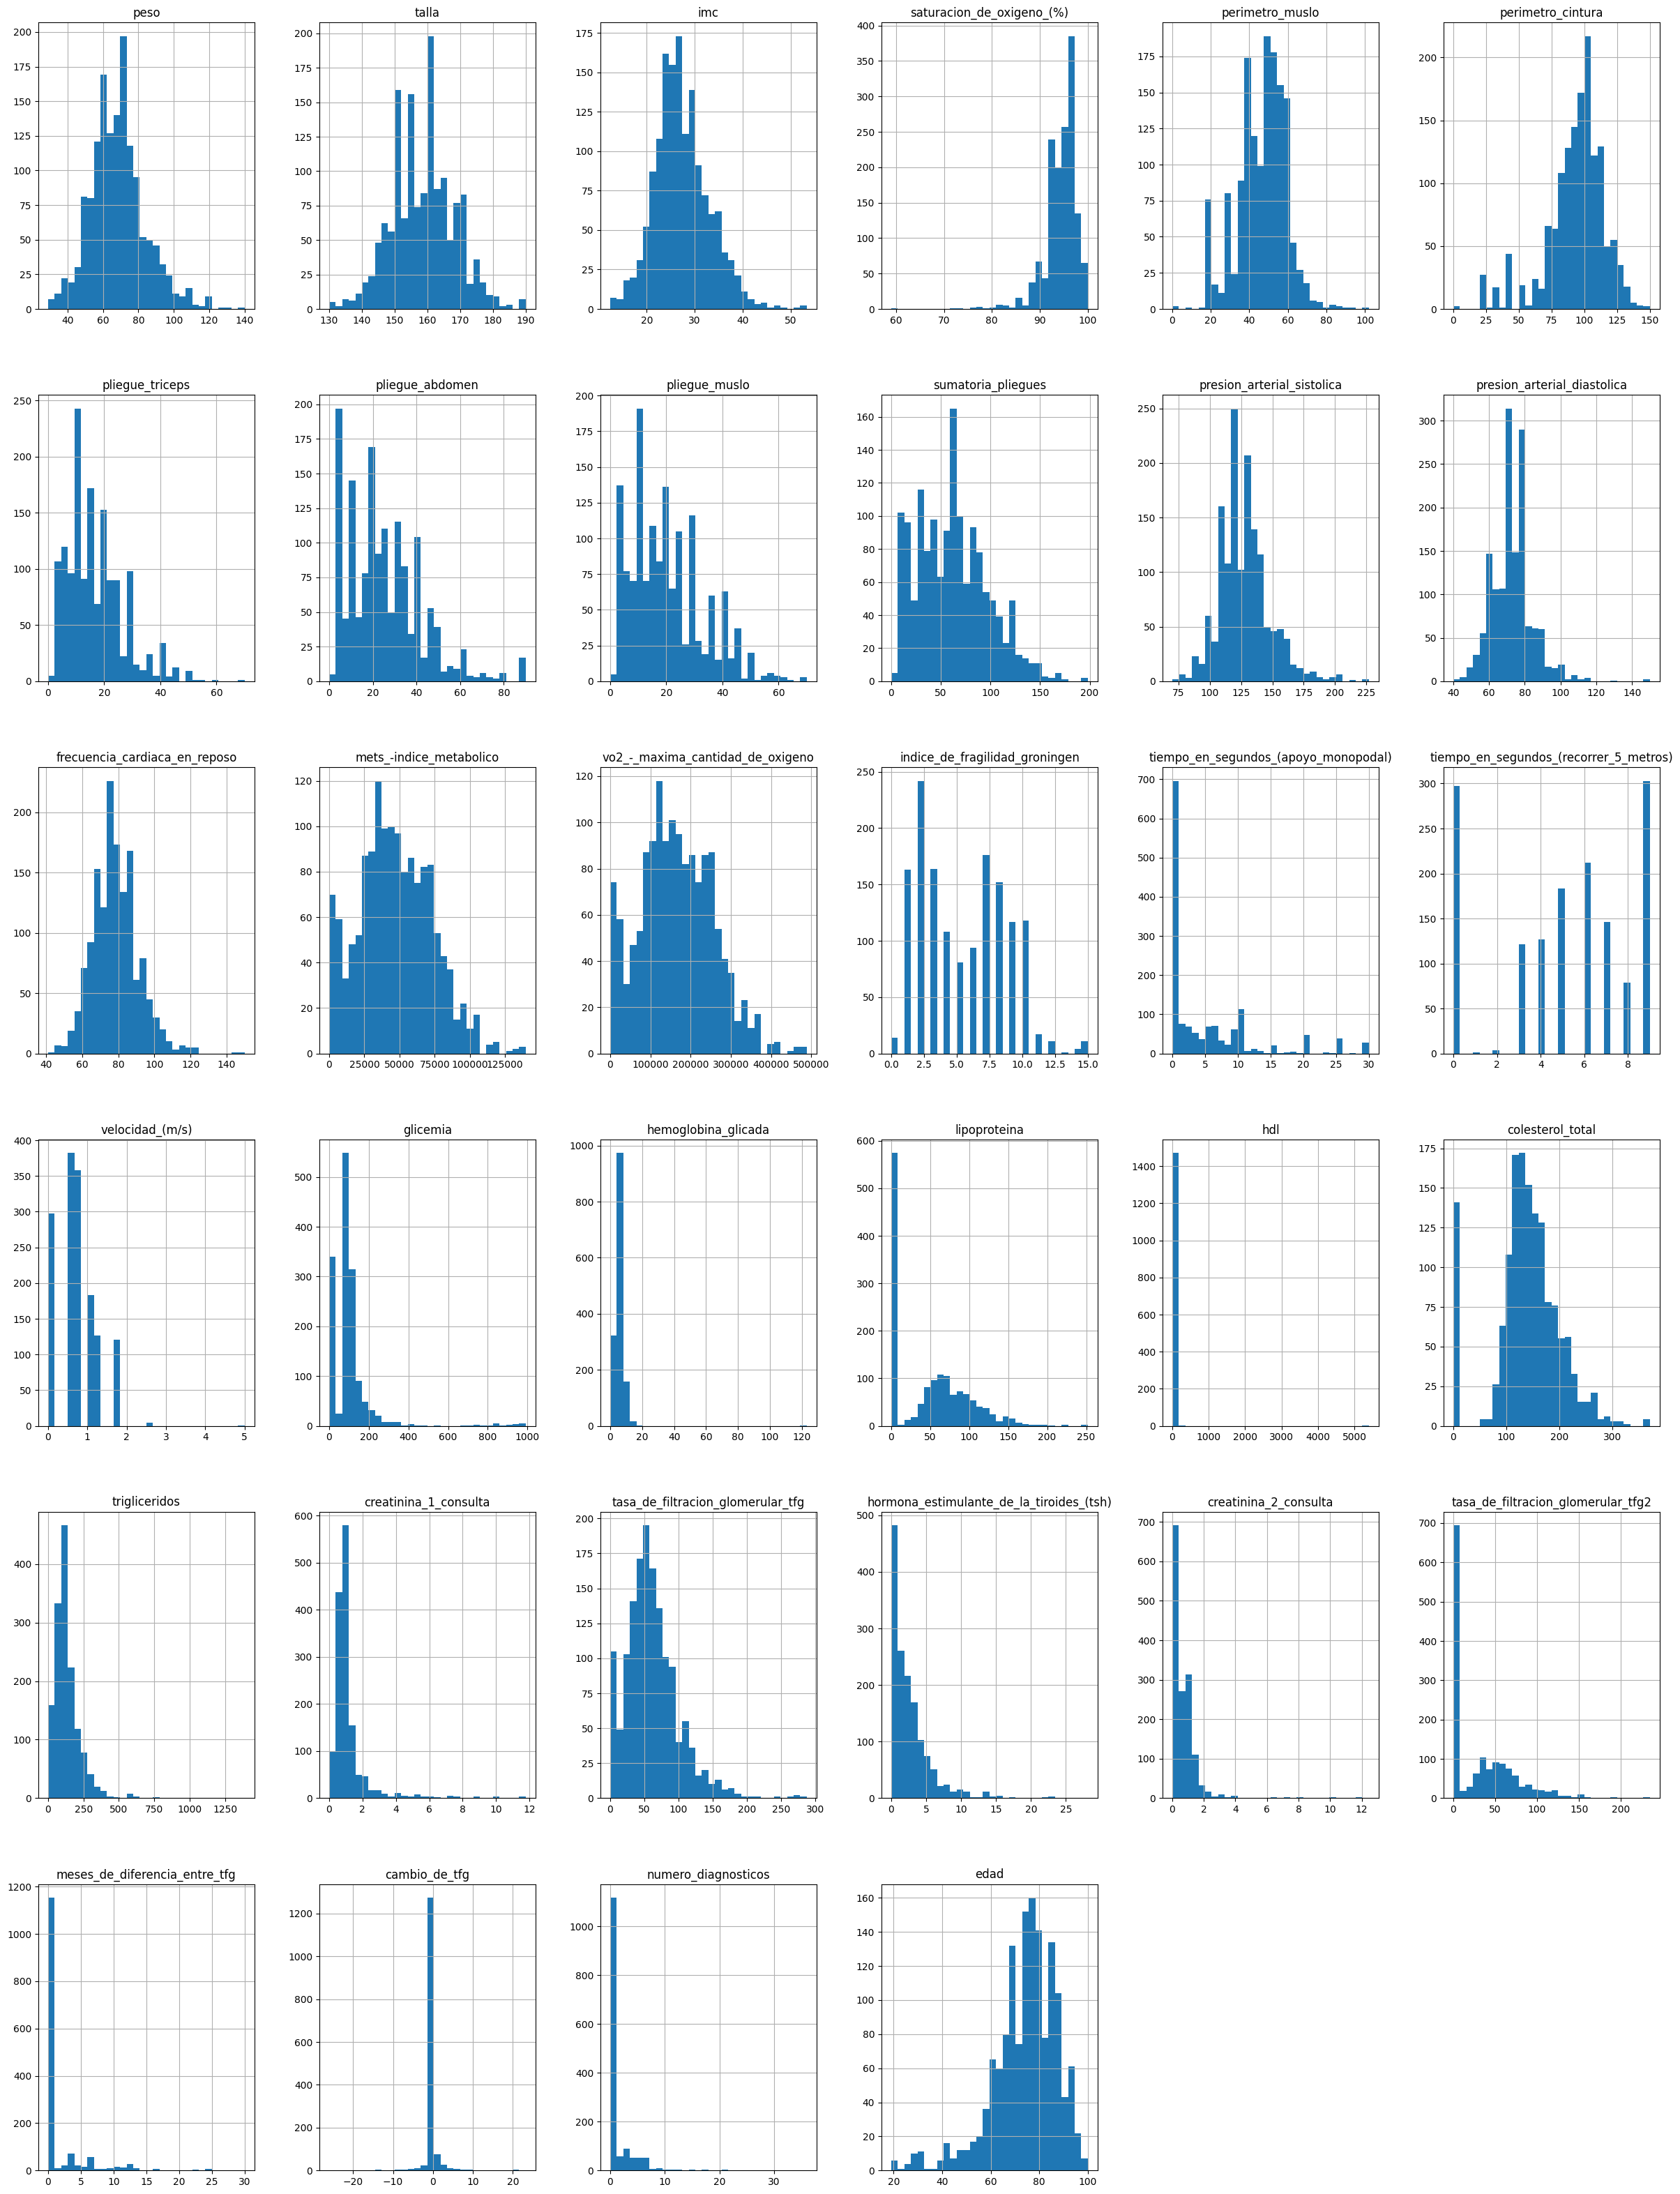

In [43]:
# Se realizan los histogramas para cada variable numérica
%matplotlib inline
numericas.hist(bins=30, figsize=(30, 40))
plt.show()

* Se identifica como en algunas pruebas especificas como el cambio_de_tfg, creatinina_2_consulta, trigliceridos y otras, tienen datos muy extremos con tendencia hacia la derecha que quizás podrían ser datos atipicos; sin embargo, al tratarse de pruebas tan especificas en cada paciente, consideramos que son personas con condiciones graves de salud y por este motivo estan en el hospital.

* Por otro lado, las variables principales como la edad, muestra que la mayoría de pacientes son personas en estado de vejez con una media de 70 años, un peso de 70 kg, una altura de 1.65 m y un indice de masa corporal de 28, lo cual indica que la media de estas personas tienen sobrepeso.

In [44]:
# Función para diagrama de barras

def plot_category_counts(data, column_name):
    counts = data[column_name].value_counts()
    m = pd.DataFrame({column_name: counts.index, 'Count': counts.values})
    m = m.sort_values(by=column_name)
    sns.barplot(data=m, y=column_name, x='Count')
    plt.show()

In [45]:
categoricas=categoricas.astype(str)

 # <h1> Conocer distribución de las variables categóricas por número total de personas

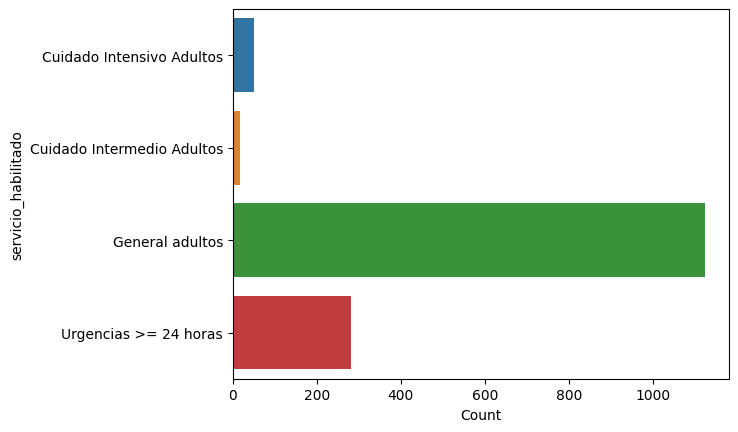

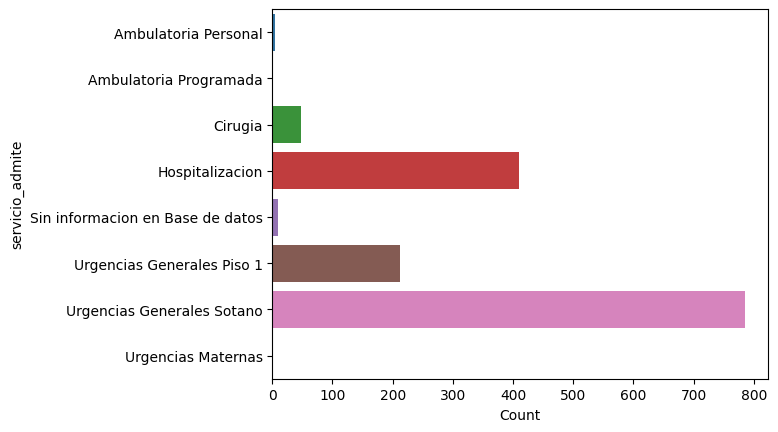

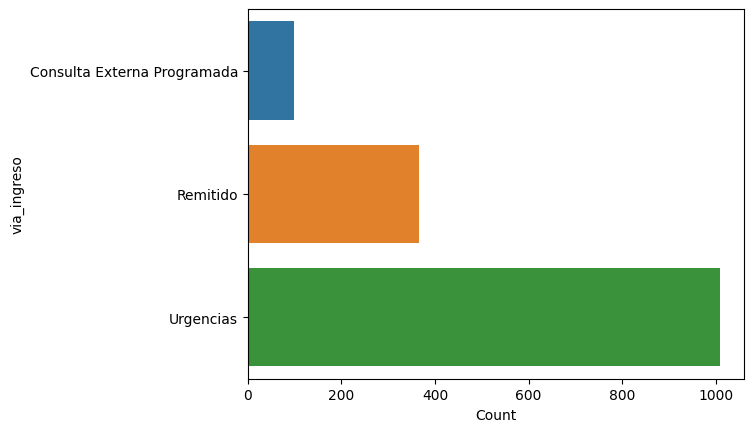

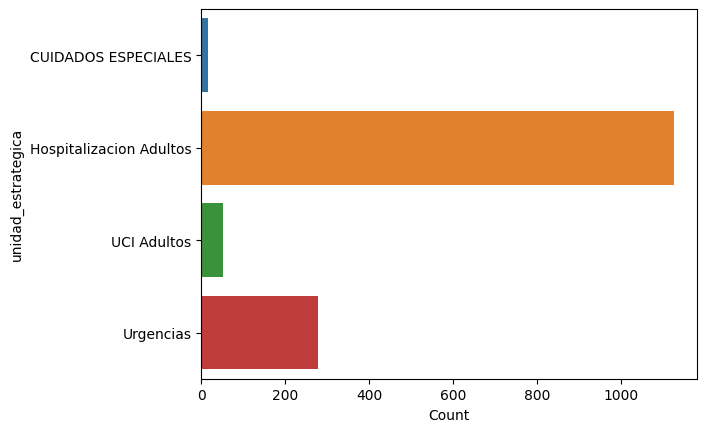

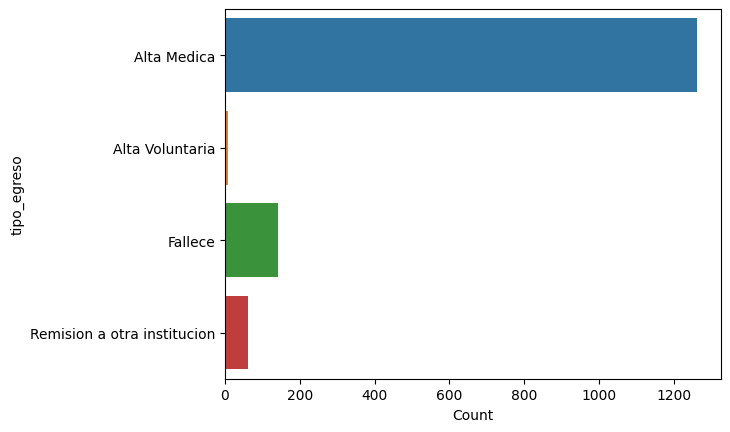

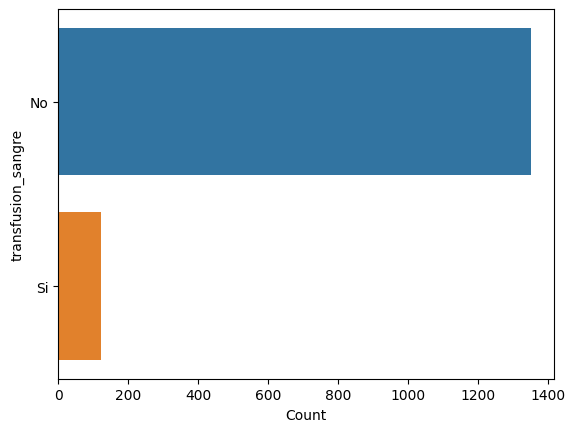

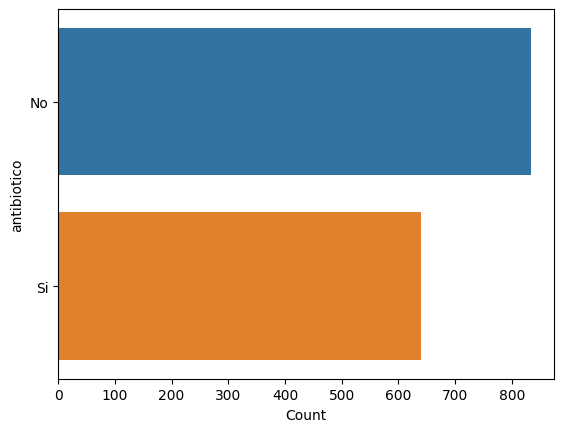

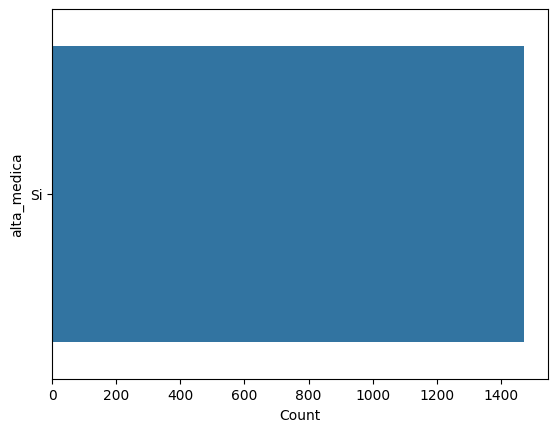

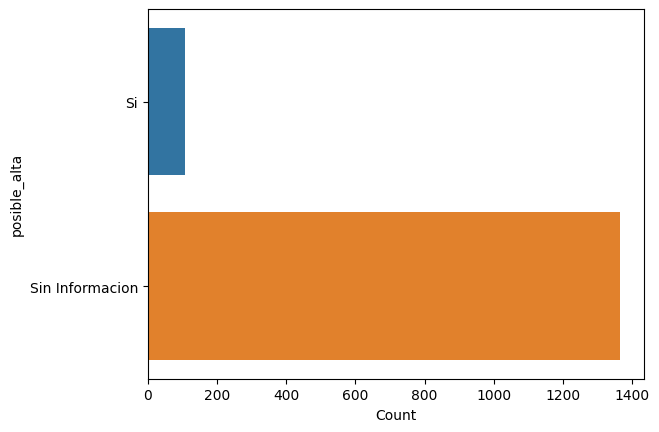

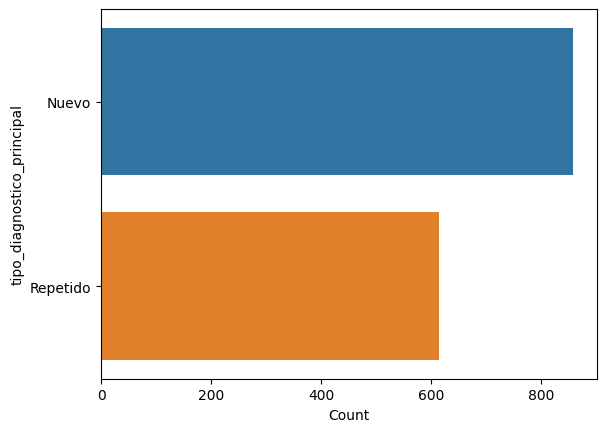

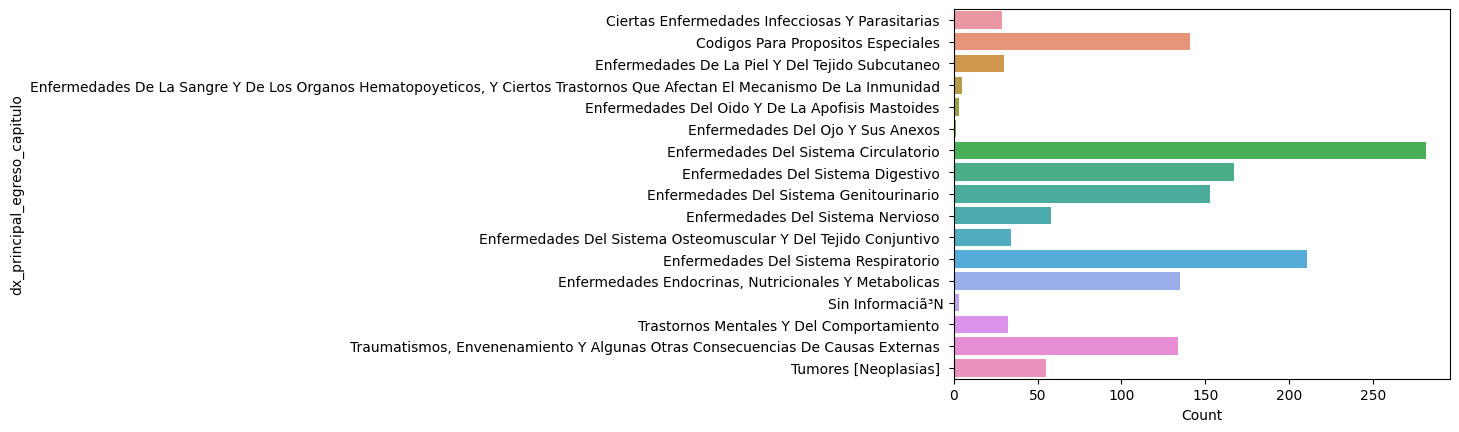

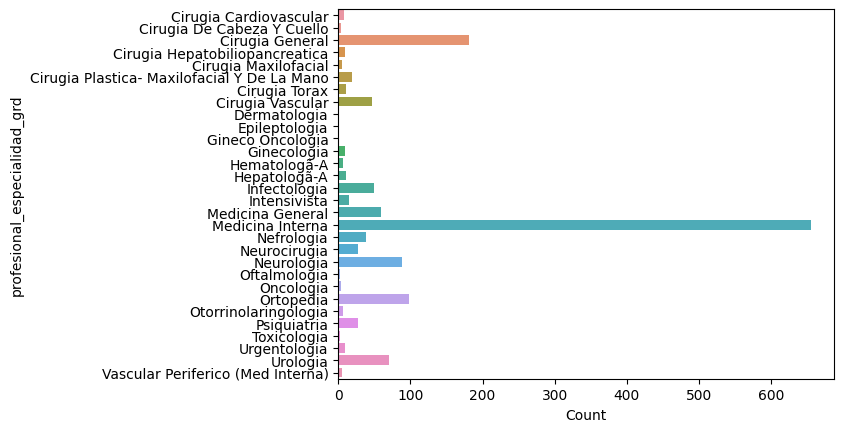

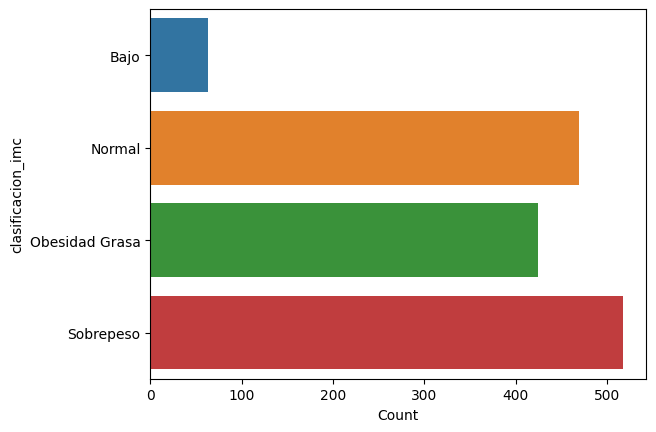

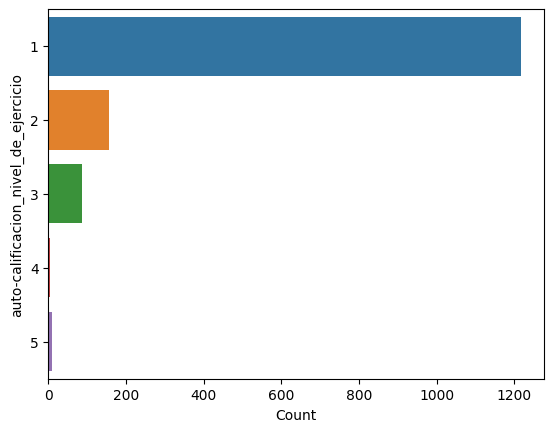

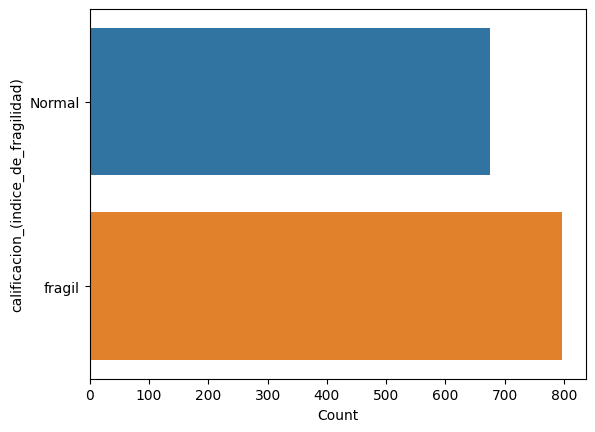

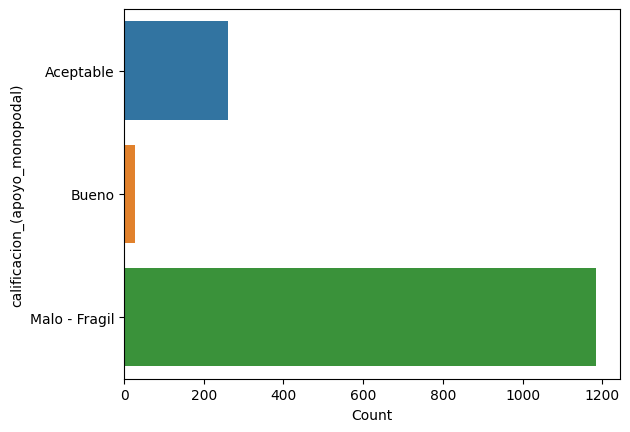

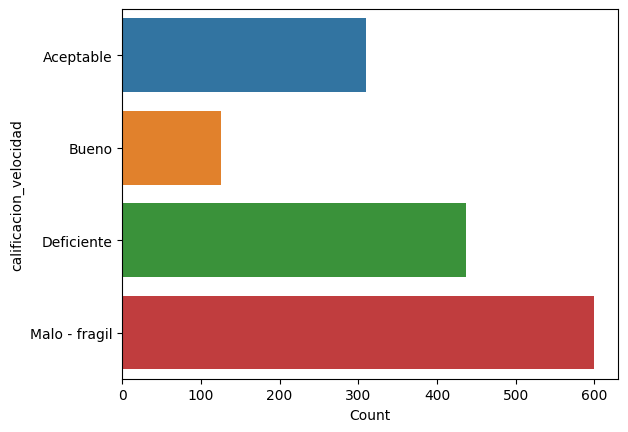

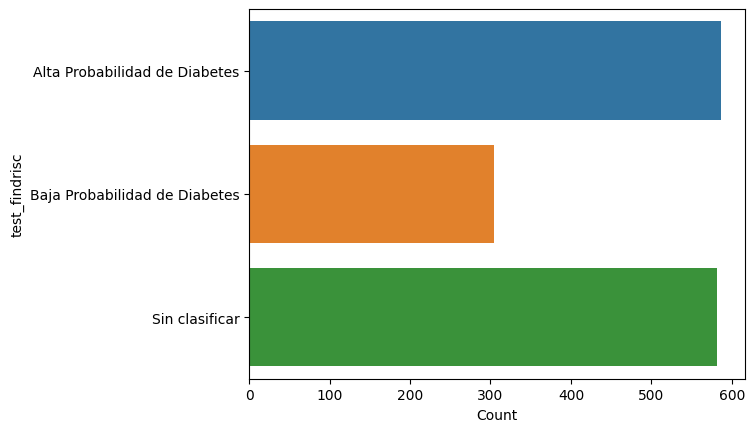

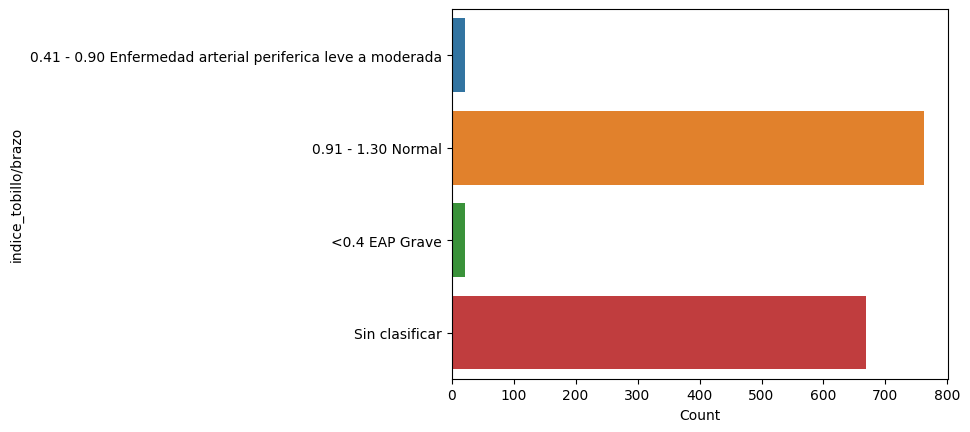

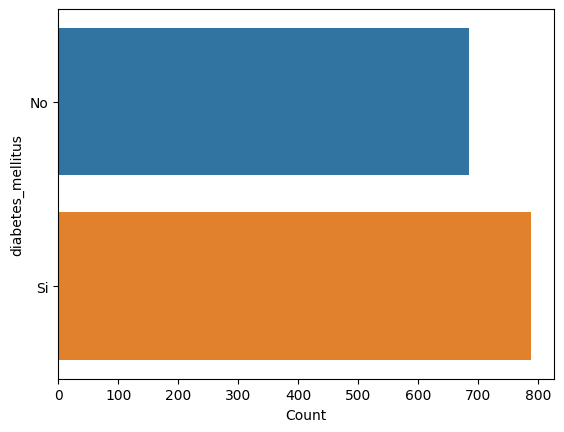

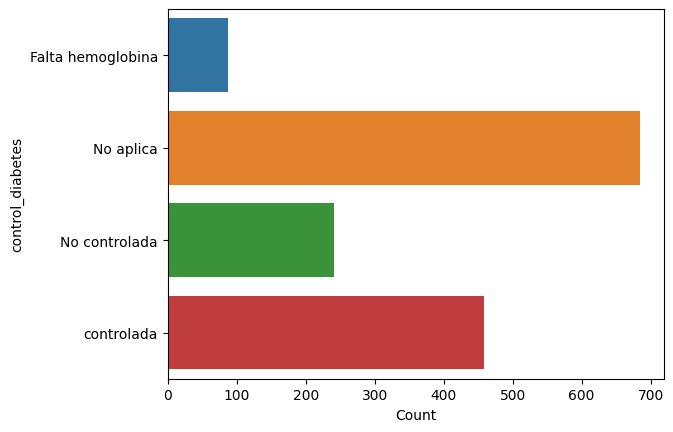

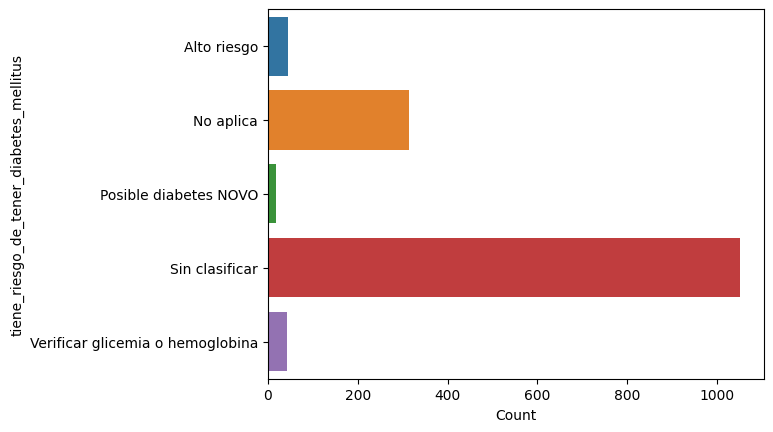

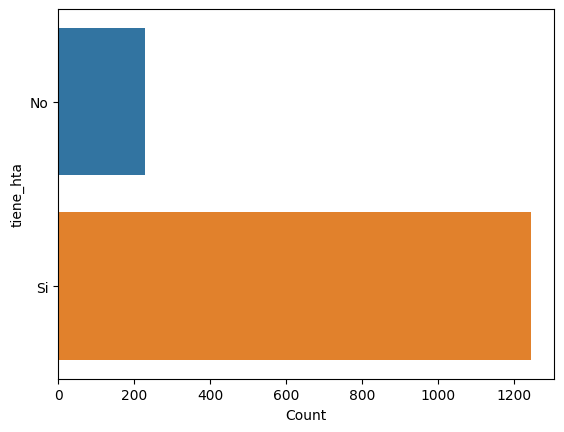

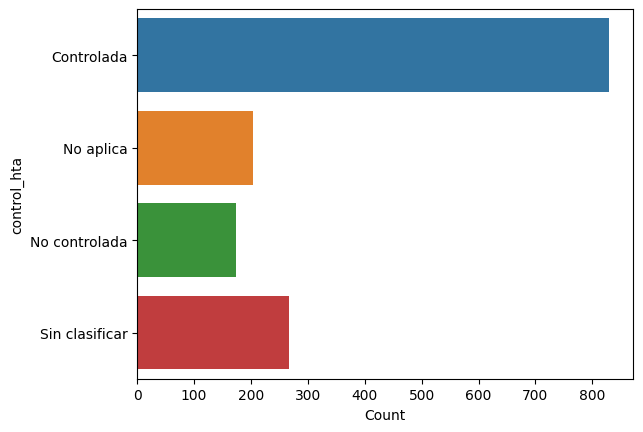

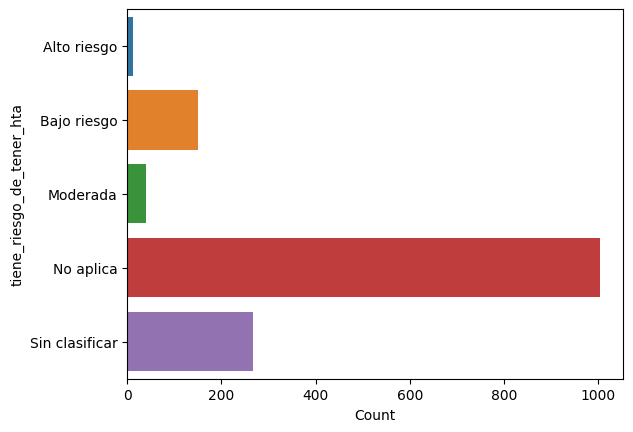

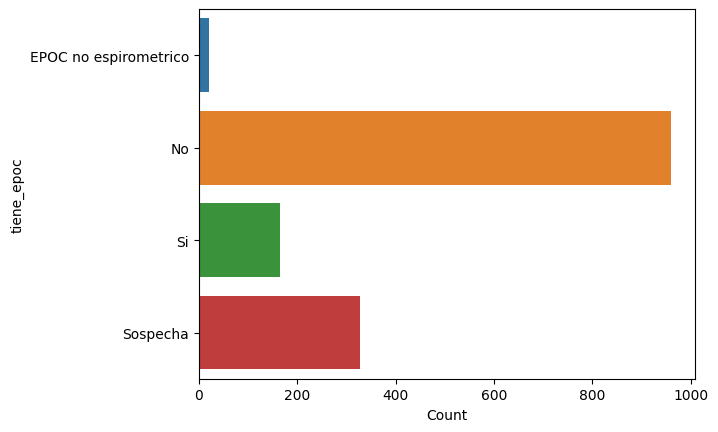

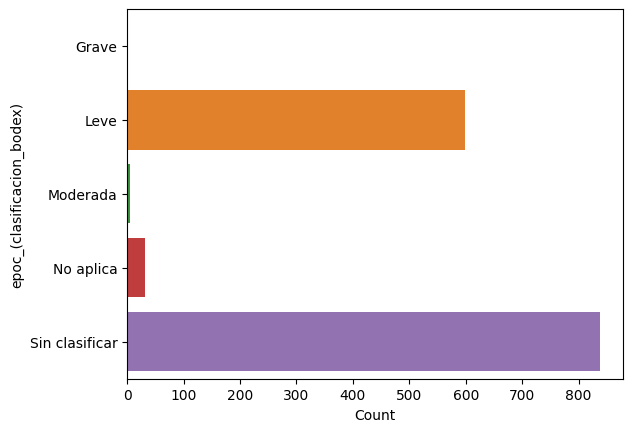

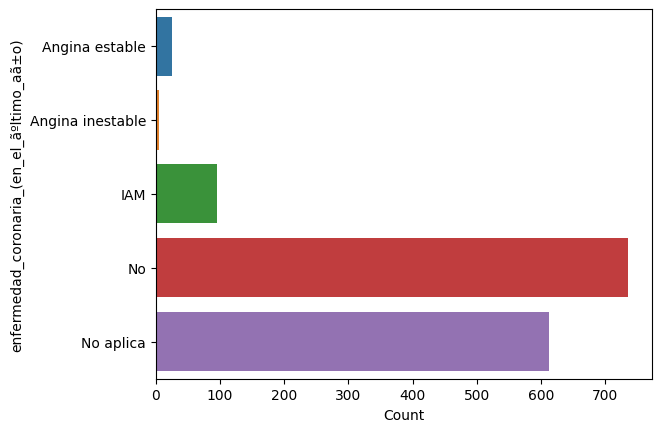

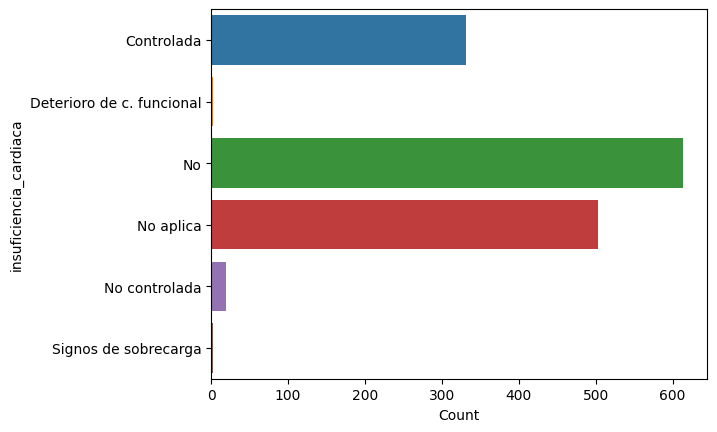

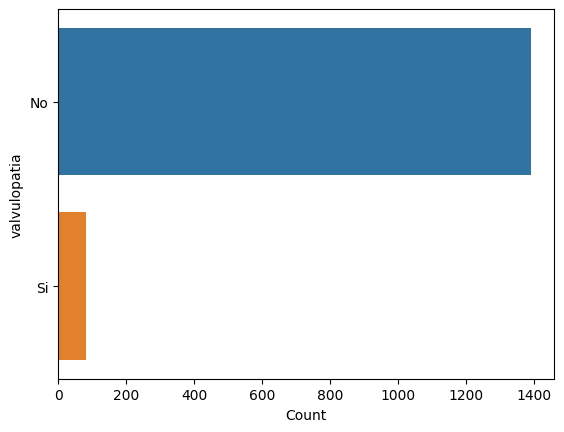

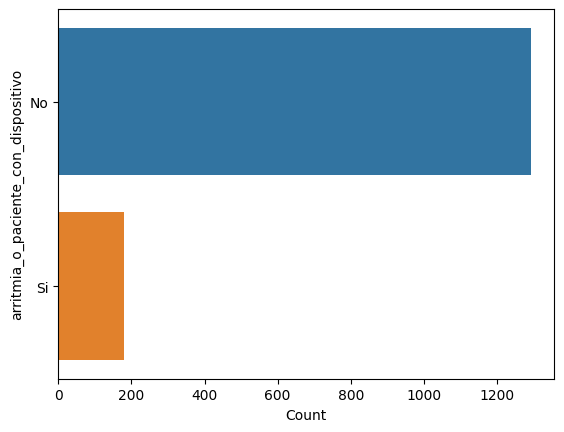

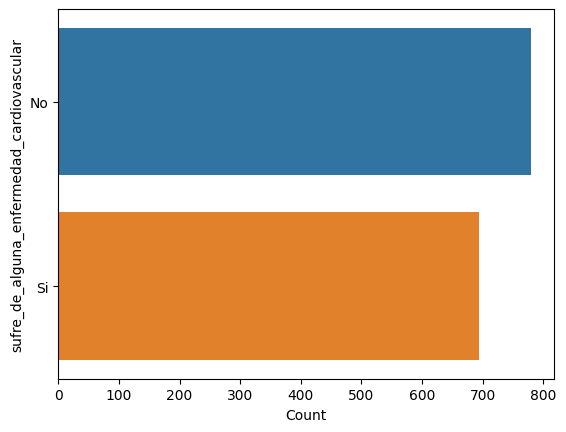

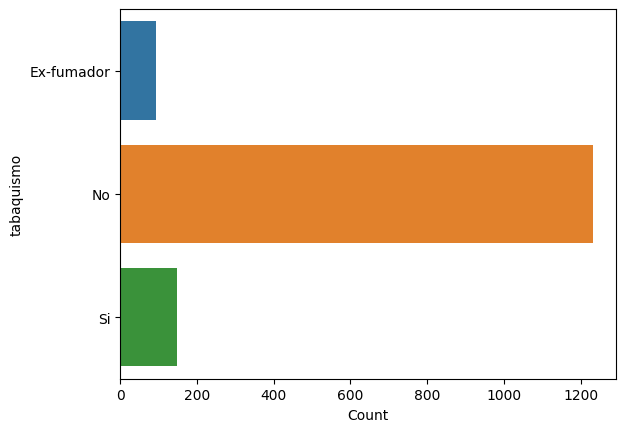

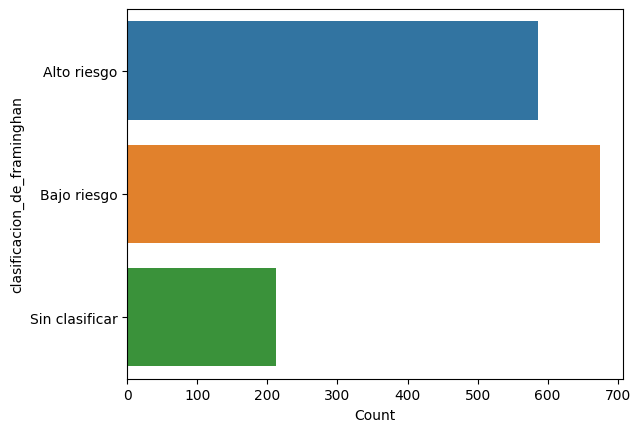

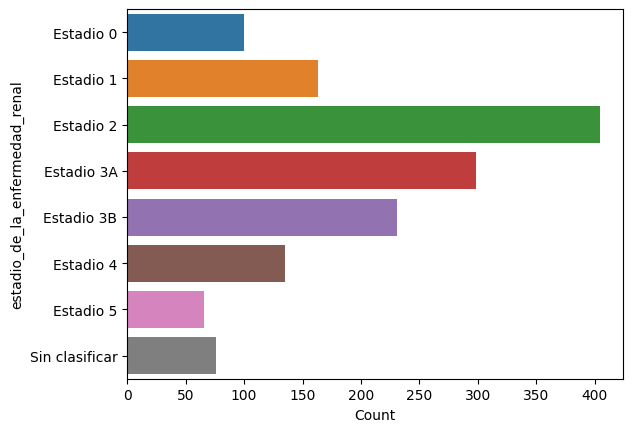

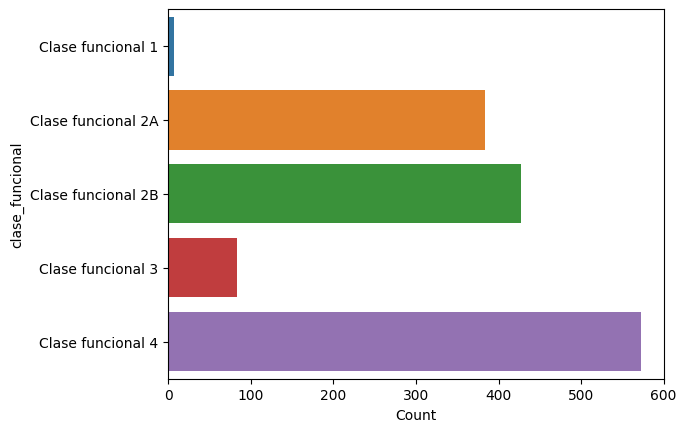

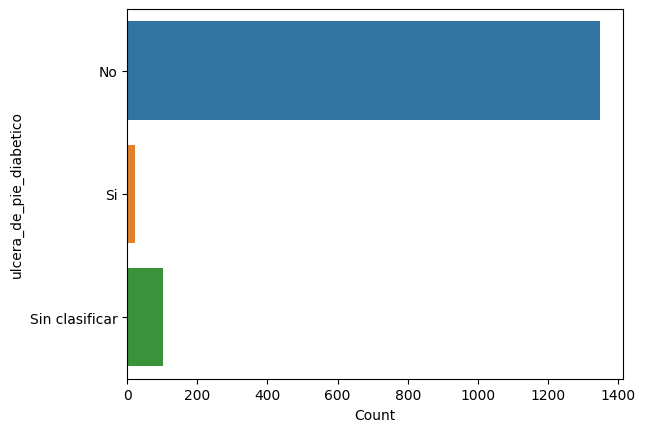

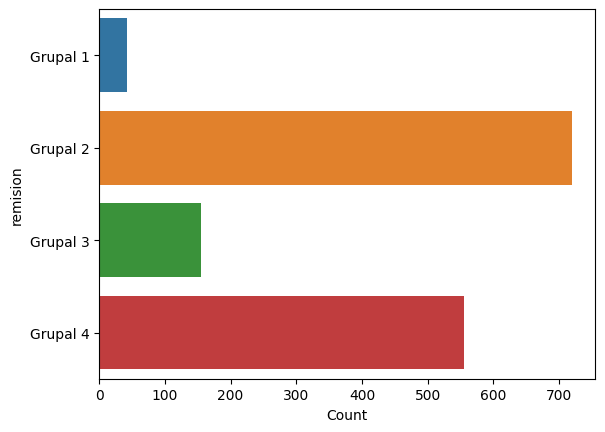

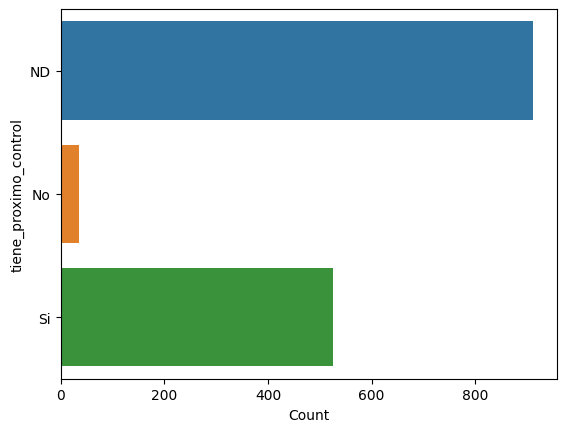

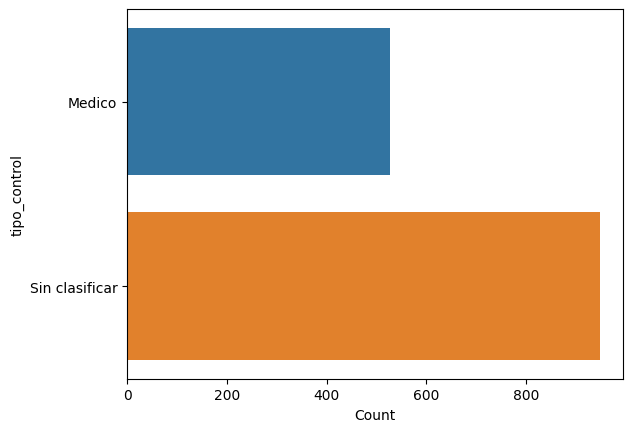

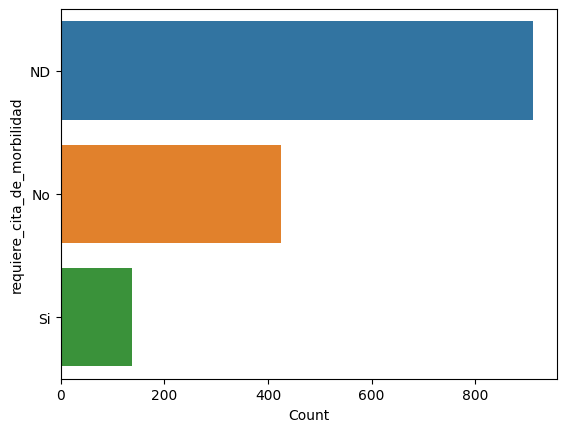

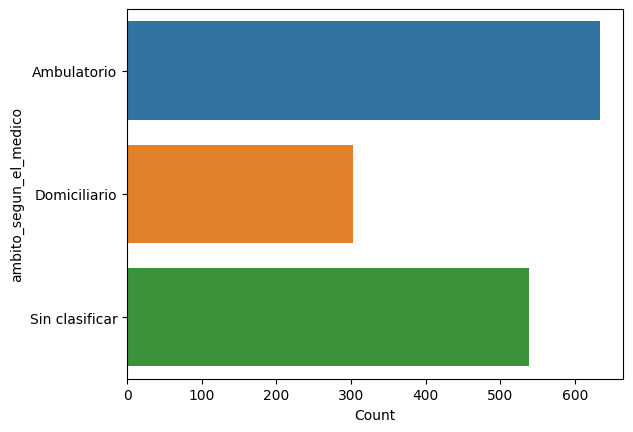

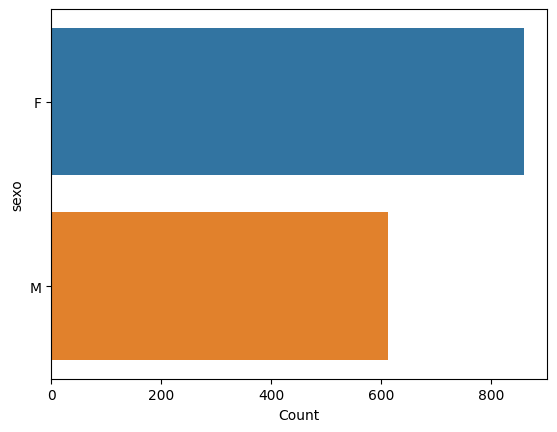

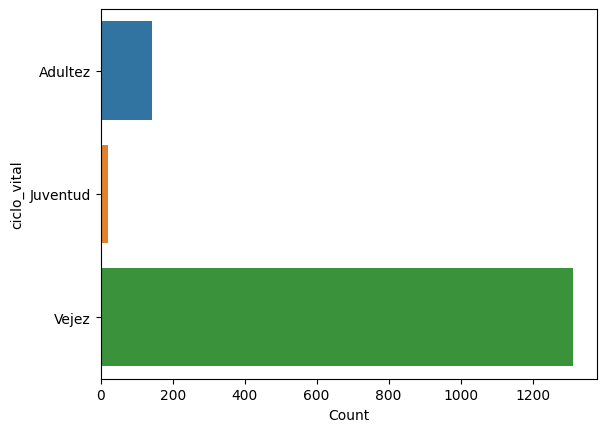

In [46]:
for column in categoricas.columns:
    plot_category_counts(categoricas, column)

* La mayoría de personas pertenecen a la clase funcional 4, que corresponde a pacientes frágiles y tendrán atención de manera domiciliaria, la segunda clase funcional con más número de personas es la clase 2A y 2B, las cuales son personas con un estado funcional adecuado pero tienen morbilidades o riesgos no controlados.
* El ciclo vital más predominante en la base de datos es vejez, con aproximadamente 1.300 personas, mientras que el mejor grupo es juventud con 50 personas aproximadamente.
* La gran mayoría de pacientes ingresan al servicio por via urgencias con una presencia de 1.000 personas.
* El sexo femenino tiene mayor número de pacientes.
* La mayoría de personas no fuman.
* La mayoría de pacientes no tienen arritmia o dispositivos cardiacos y no tienen insuficiencia cardiaca.
* Aproximadamente 1.000 pacientes tienen hta y la tienen controlada.


 # <h1> Análisis variable dependiente (tiempo de estancia)

In [47]:
# Se selecciono la variable target 
y=df_filtrado[['tiempo_estancia']]

In [48]:
df_filtrado['tiempo_estancia'].mean()

196.187815683224

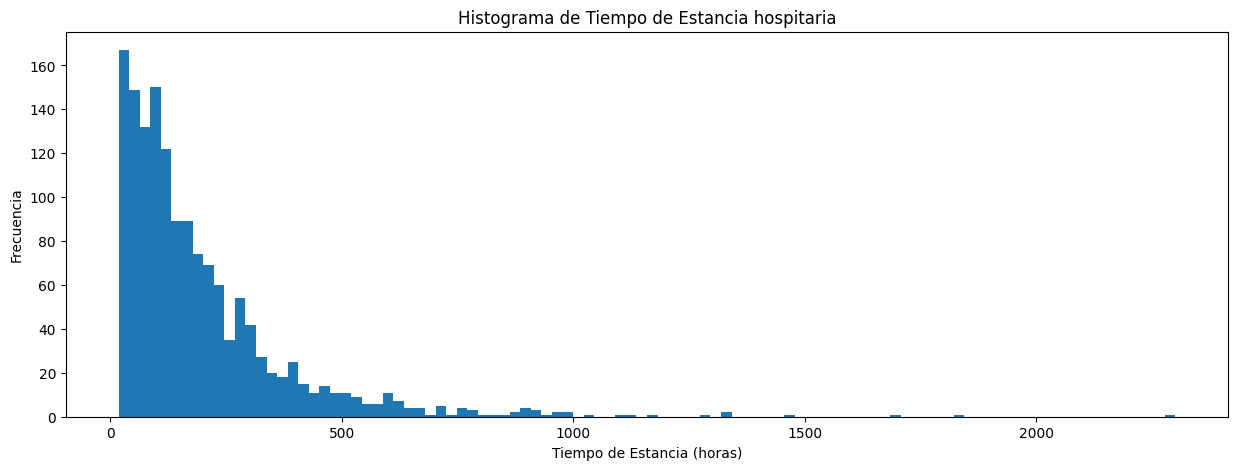

In [49]:
# Activa la visualización en línea con '%matplotlib inline'
%matplotlib inline

# Crea el histograma
plt.figure(figsize=(15, 5))
plt.hist(y['tiempo_estancia'], bins=100)
plt.title('Histograma de Tiempo de Estancia hospitaria')  # Título del gráfico
plt.xlabel('Tiempo de Estancia (horas)')  # Título del eje X
plt.ylabel('Frecuencia')  # Título del eje Y
plt.show()

* El tiempo de estancia promedio es de 195 horas, lo cual son 8 días aproximadamente.
* Existen algunas personas que tienen un tiempo más prolongado en el hospital (entre 500 y 2000 horas).

 # <h1> Conocer distribución de las variables categóricas por el promedio de la estancia hospitalaria

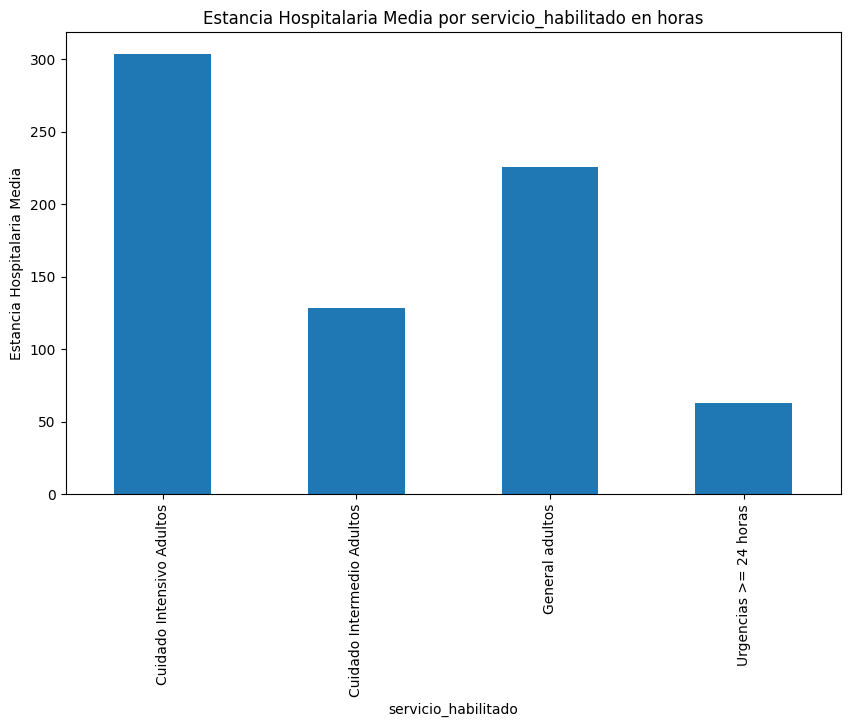

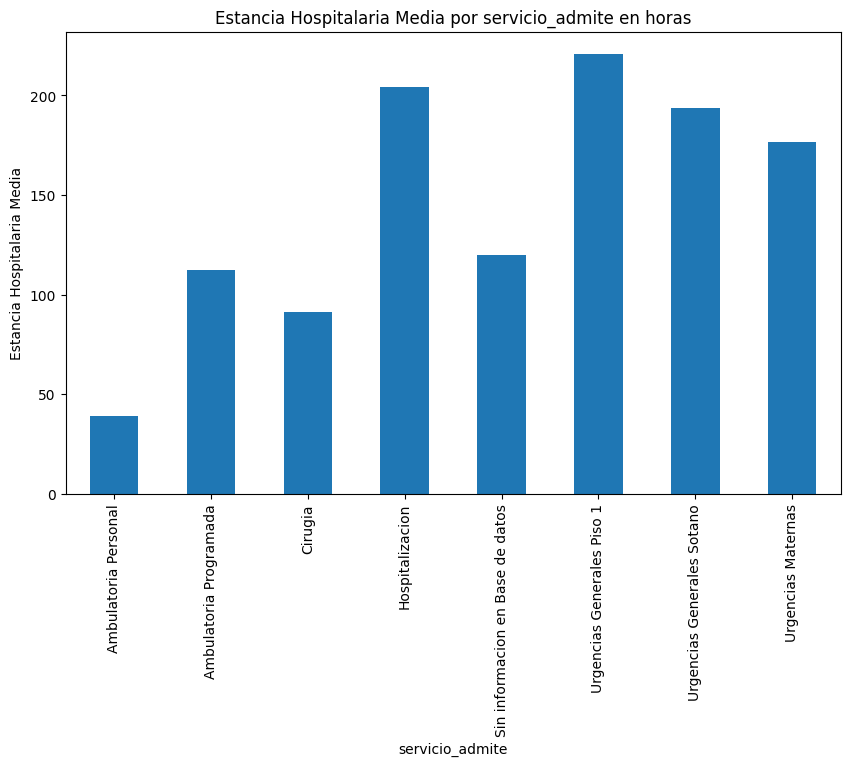

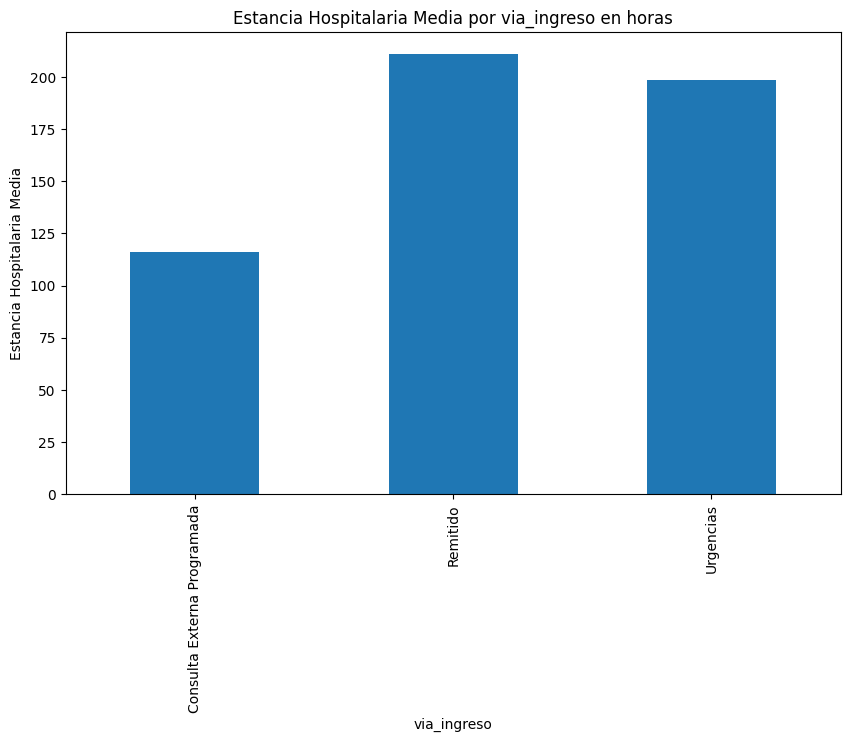

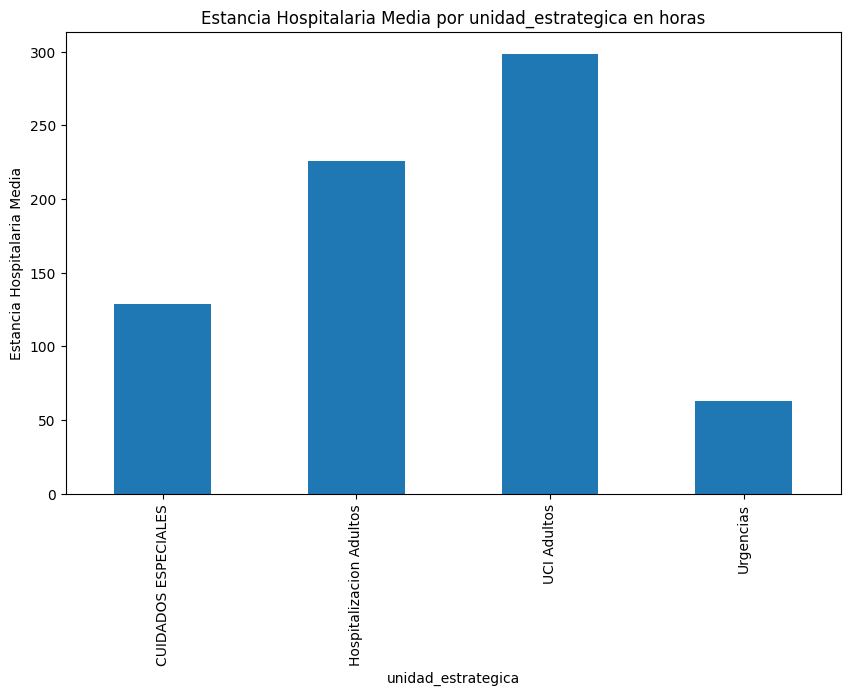

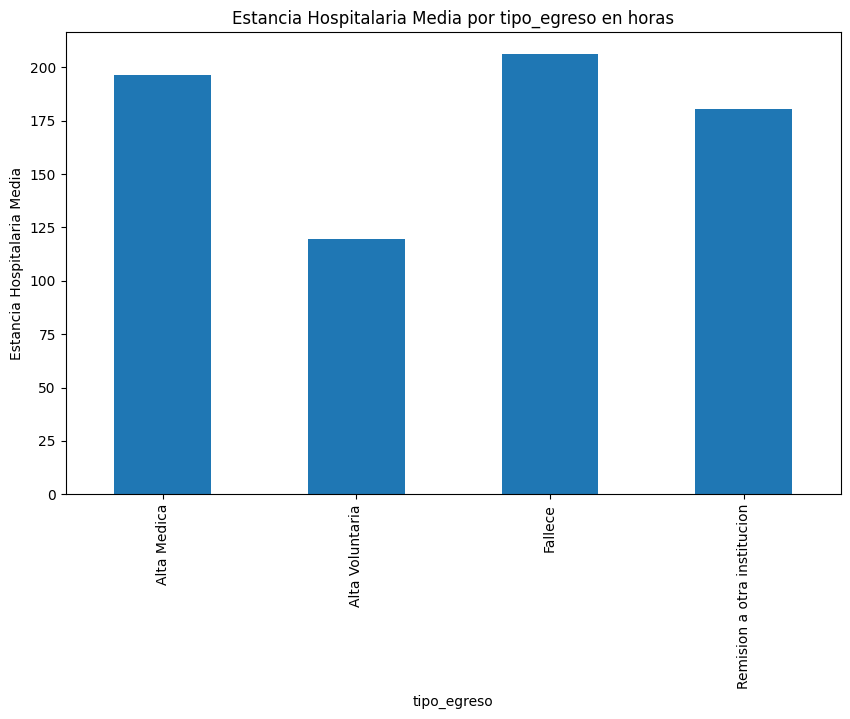

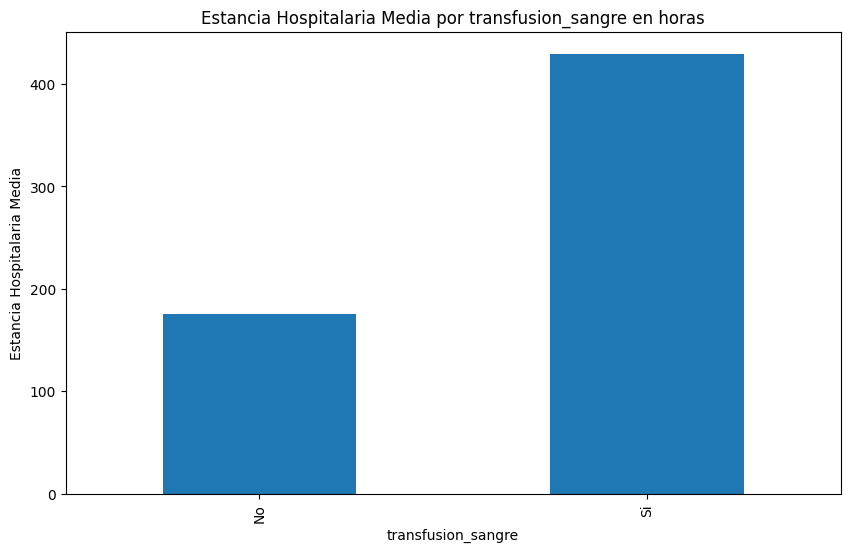

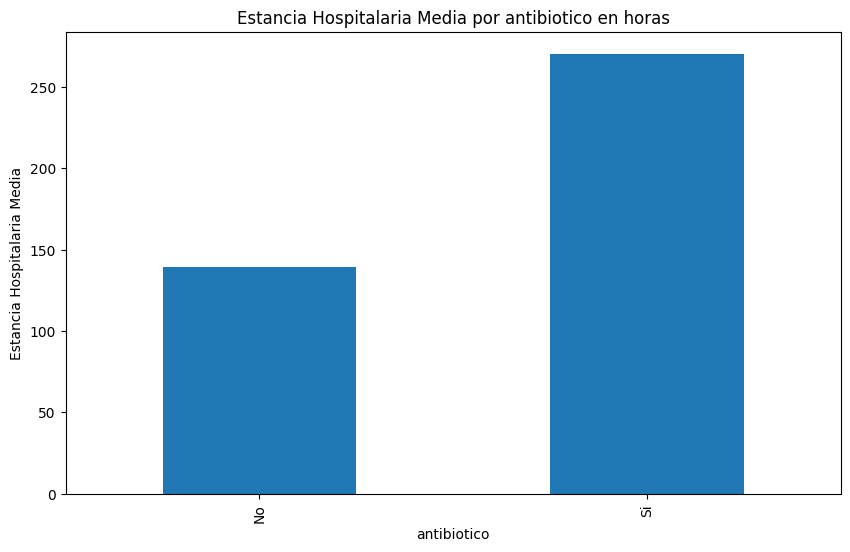

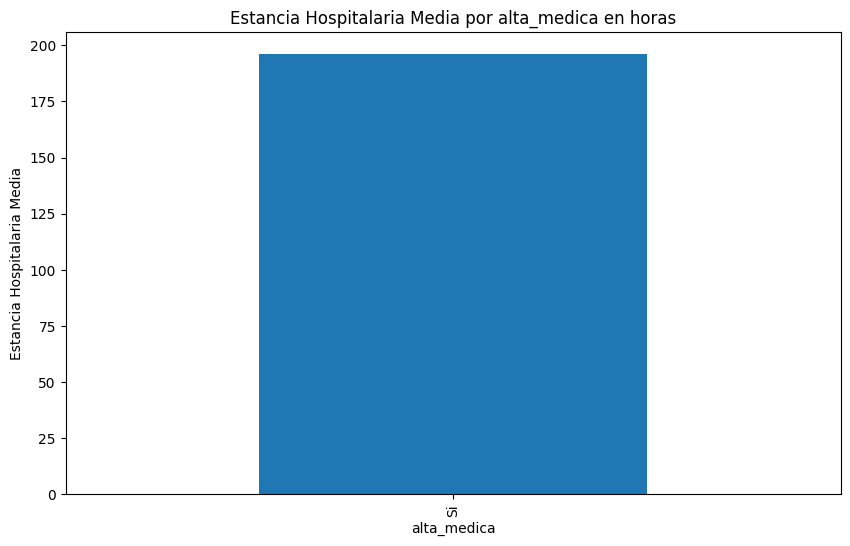

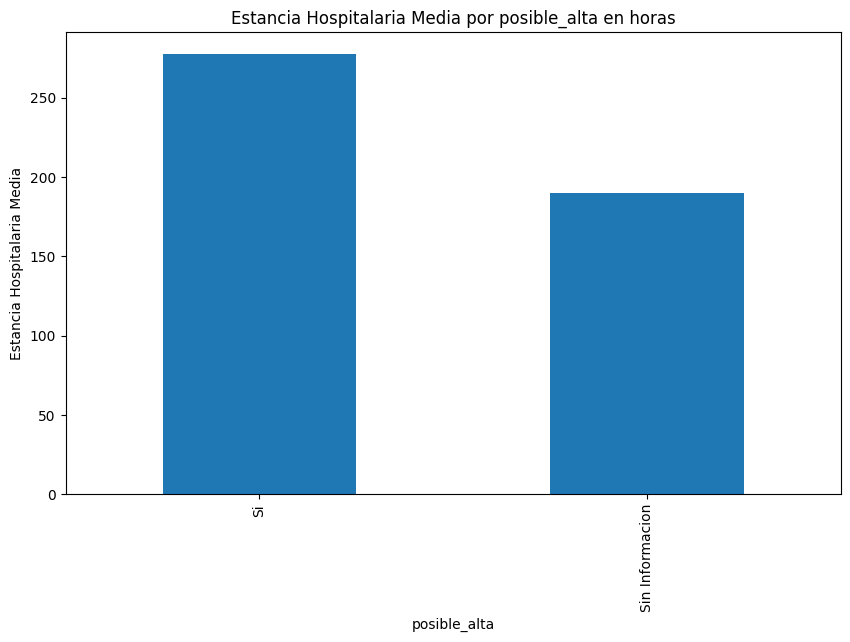

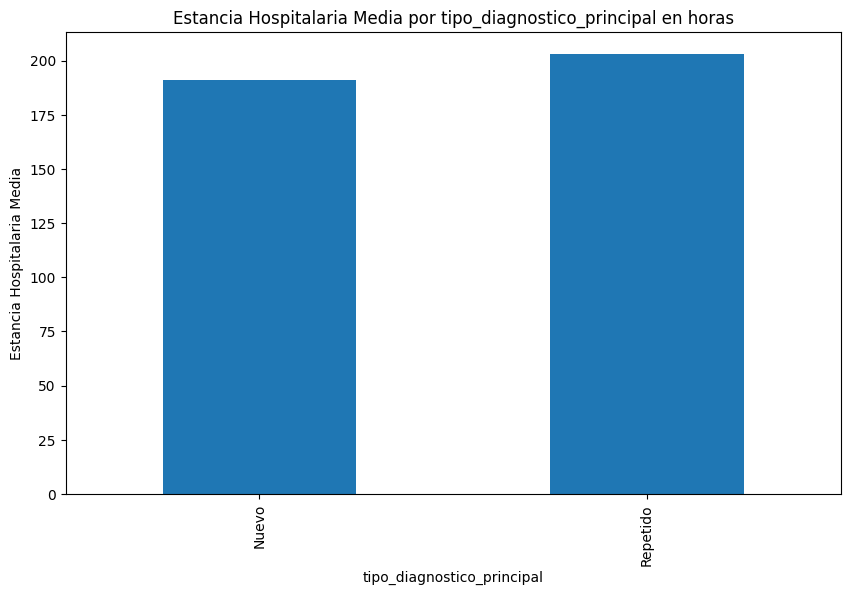

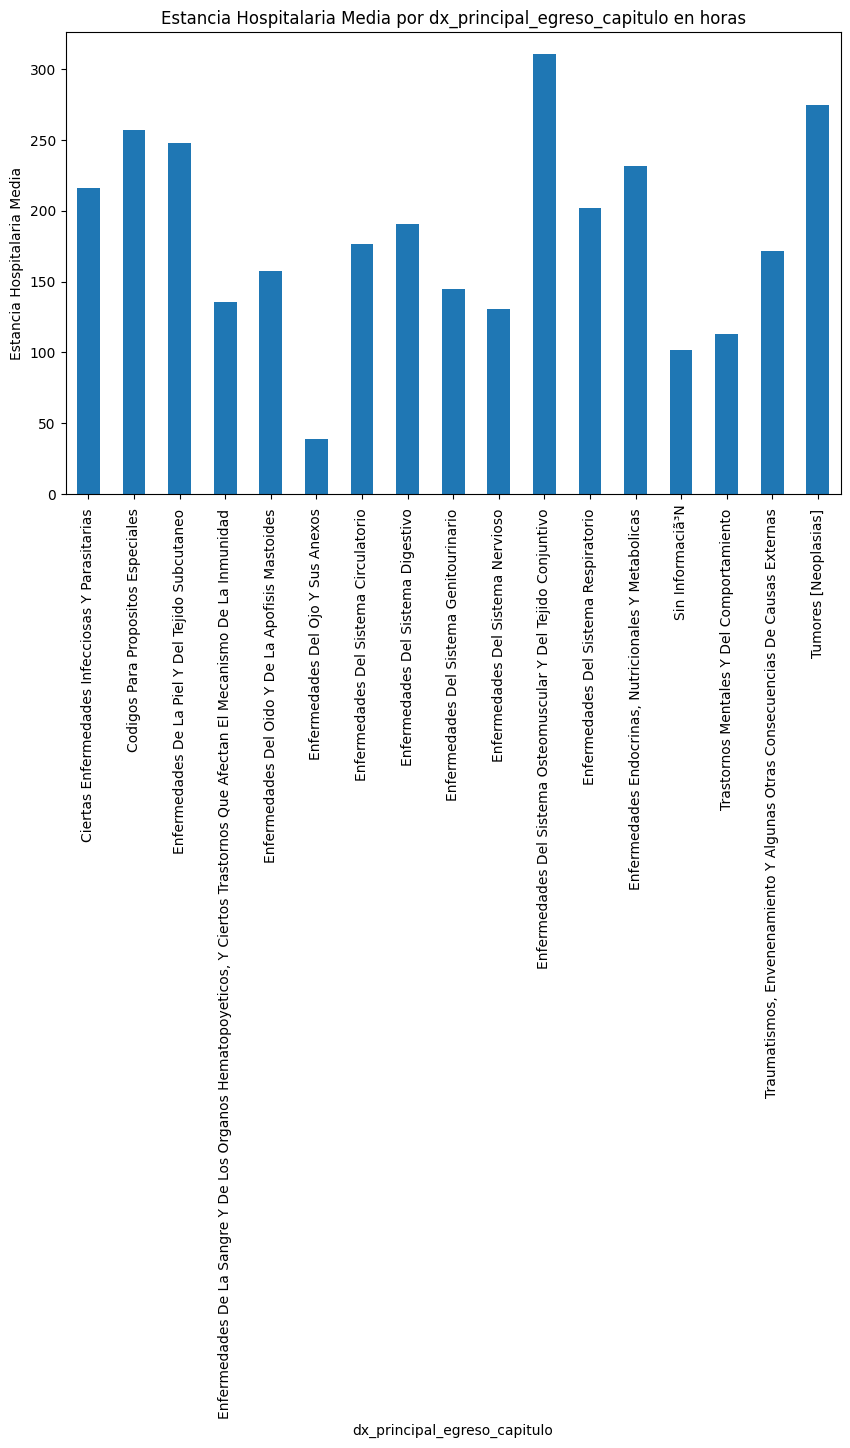

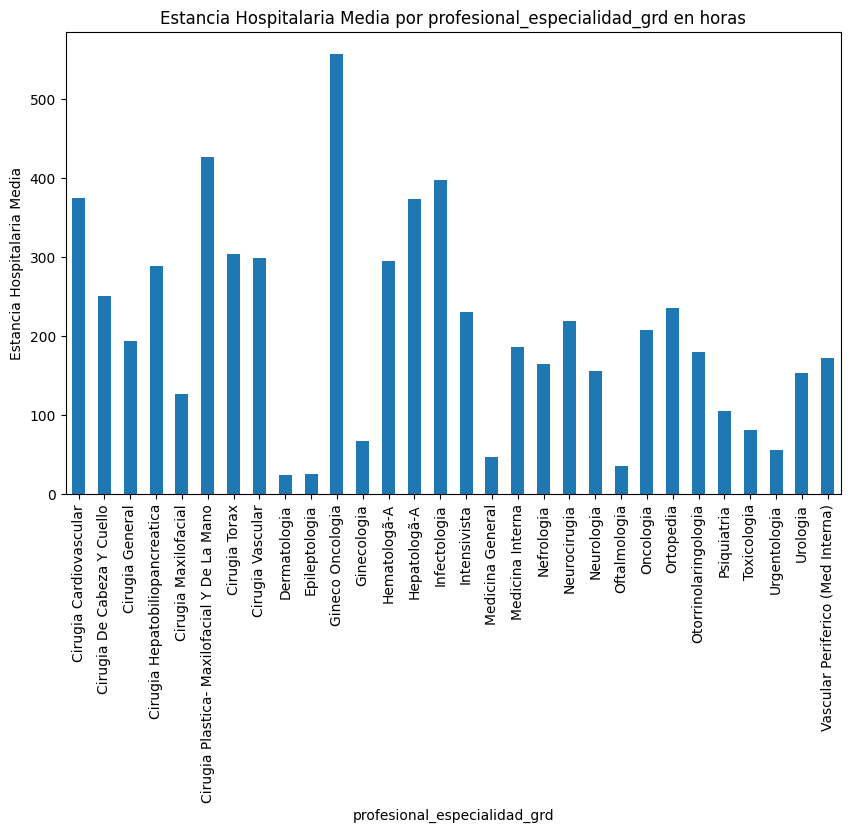

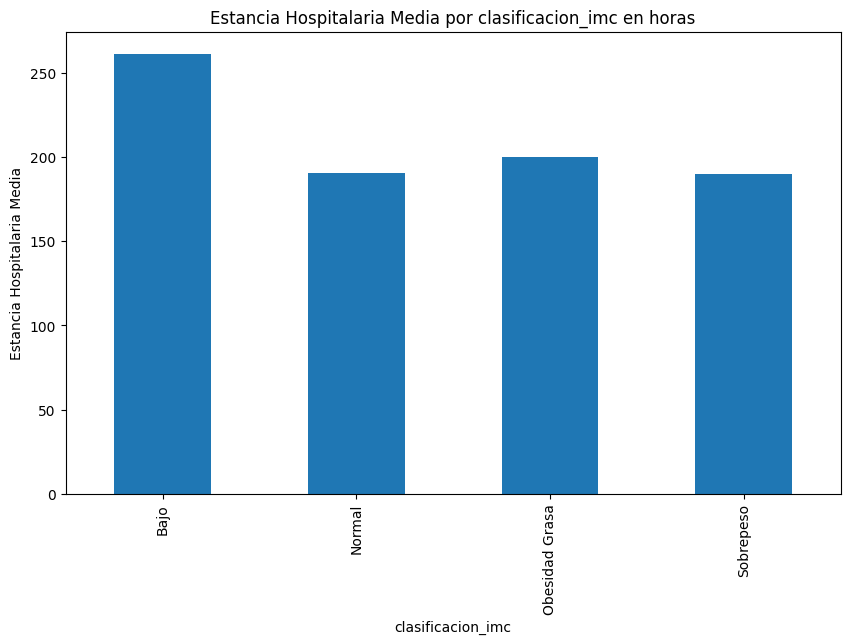

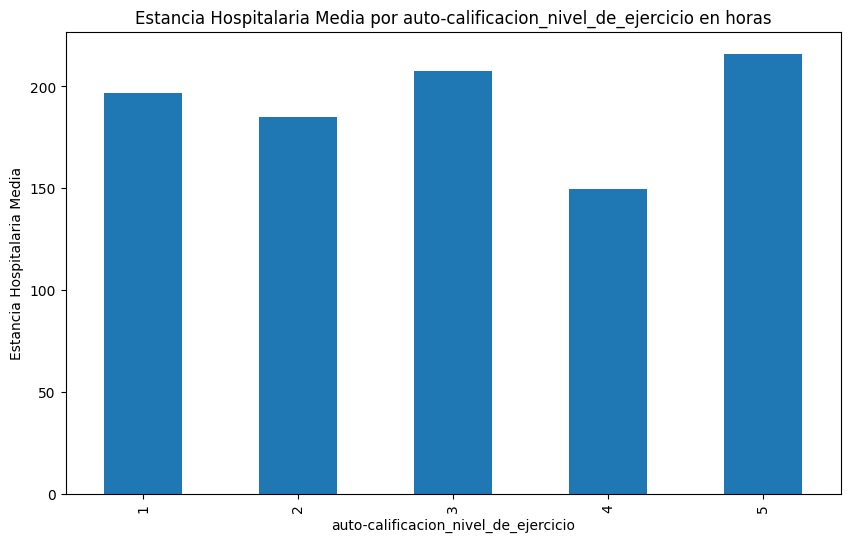

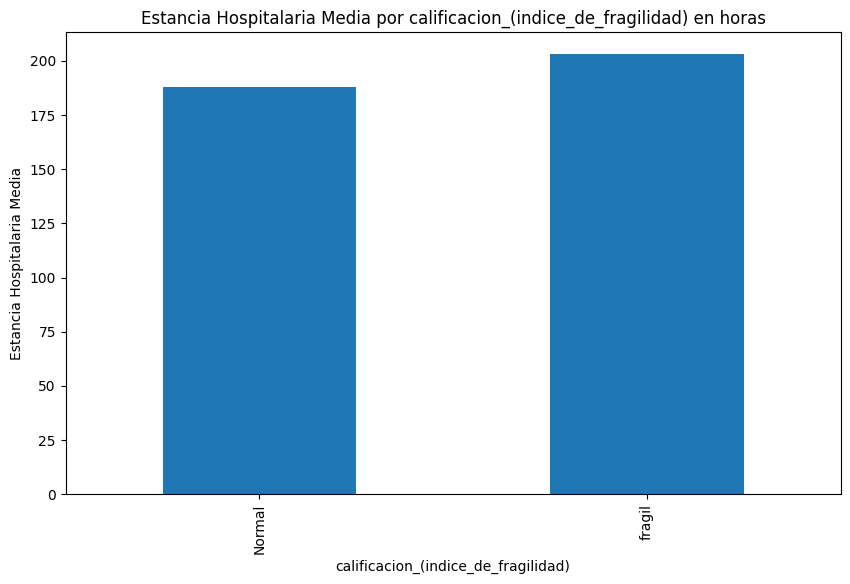

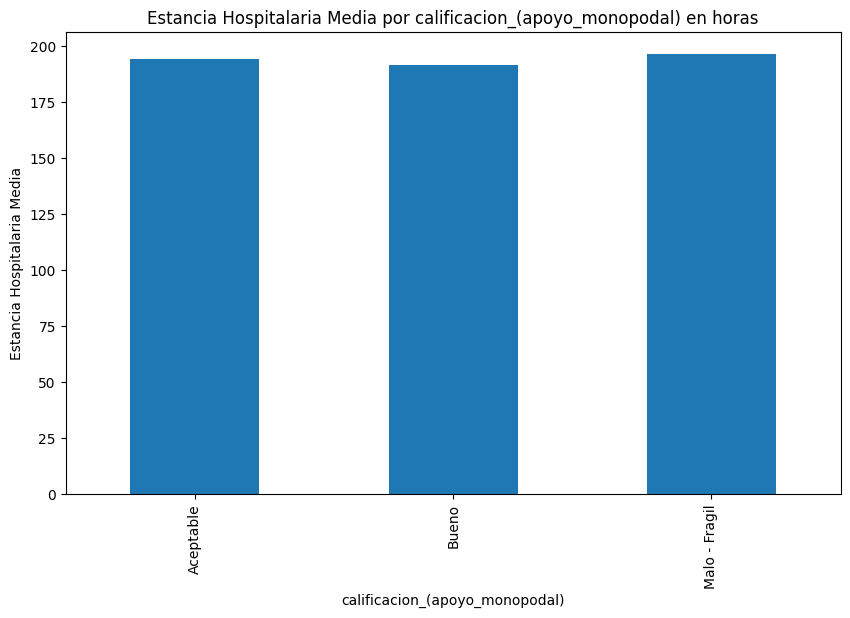

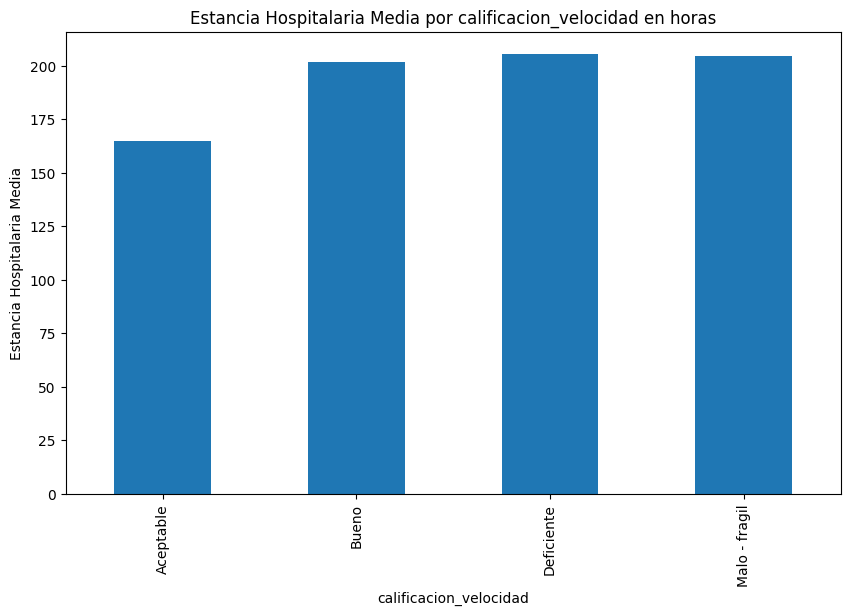

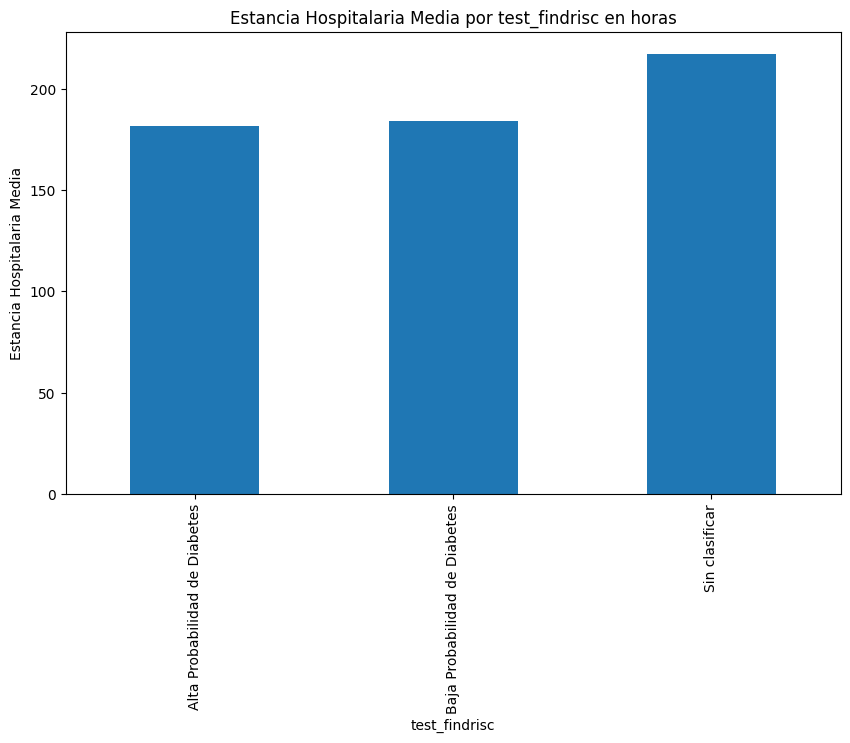

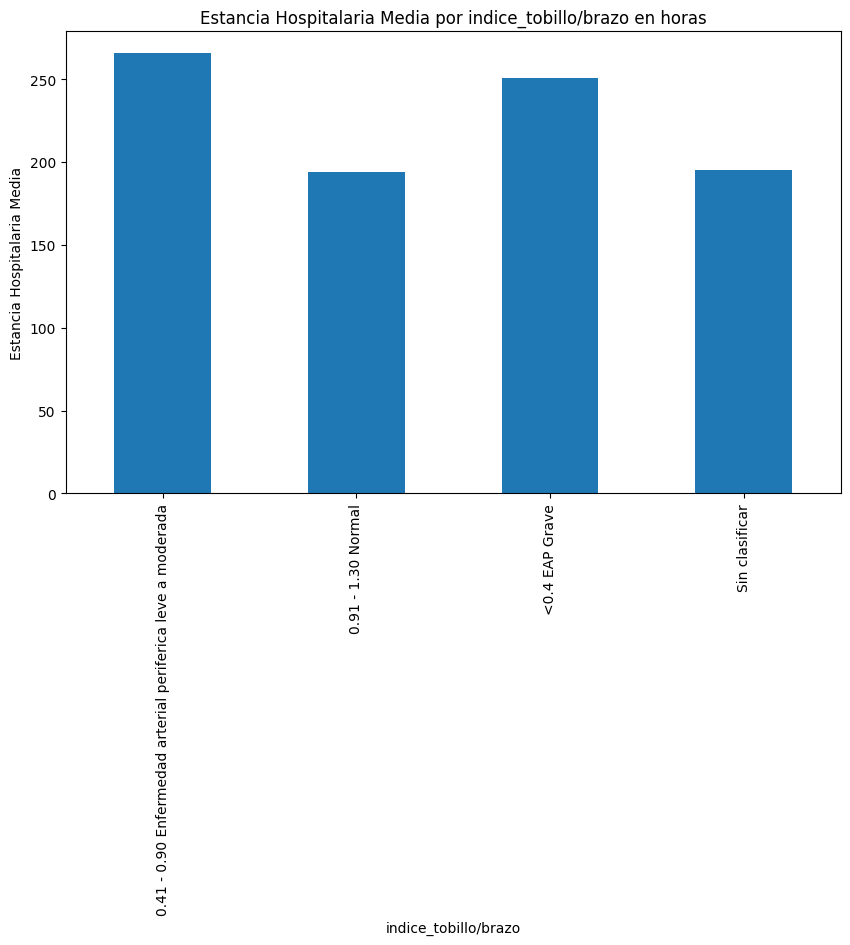

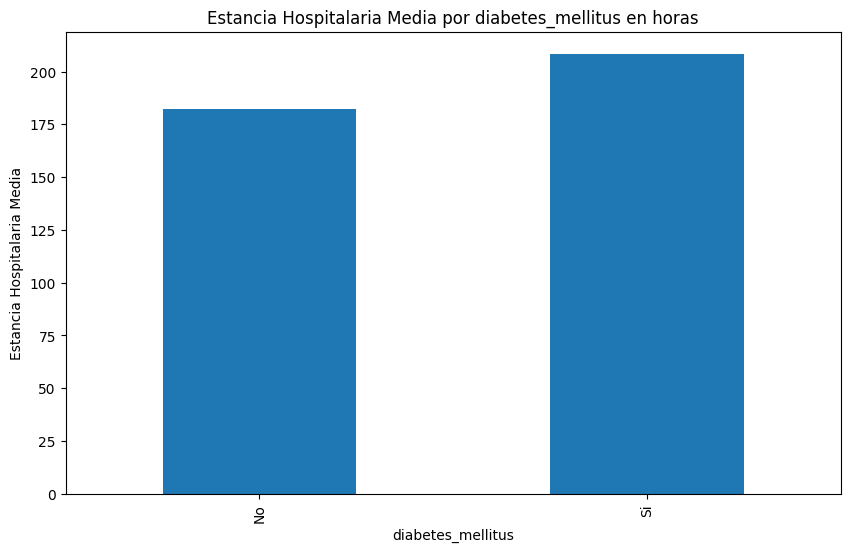

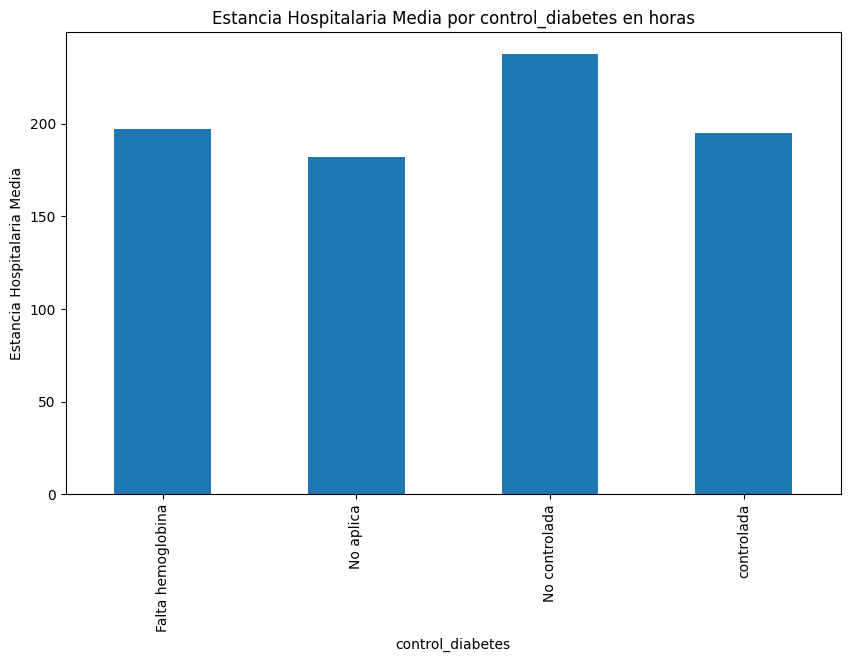

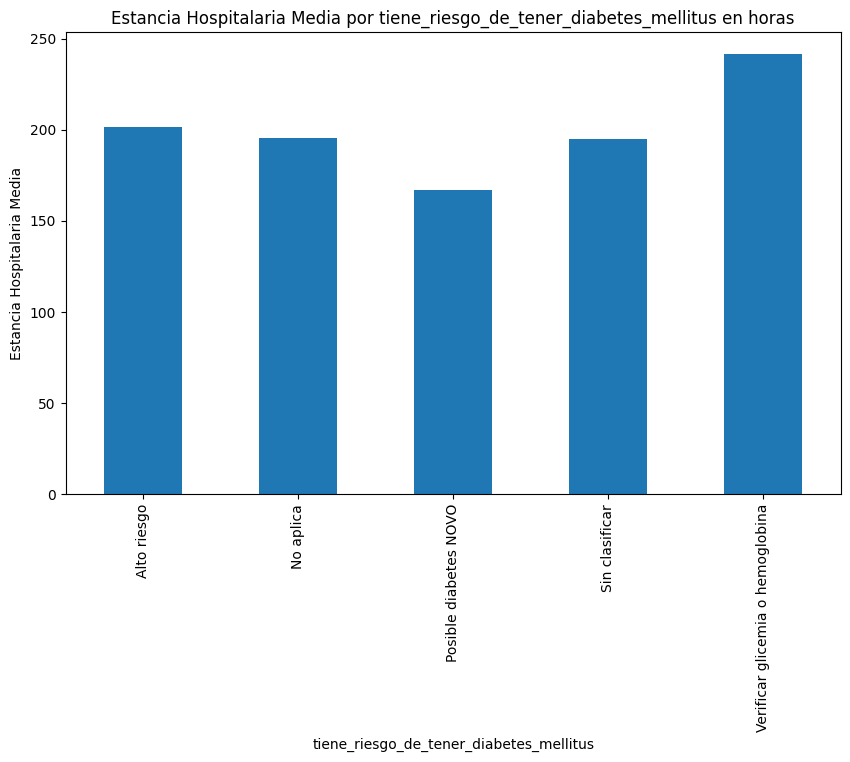

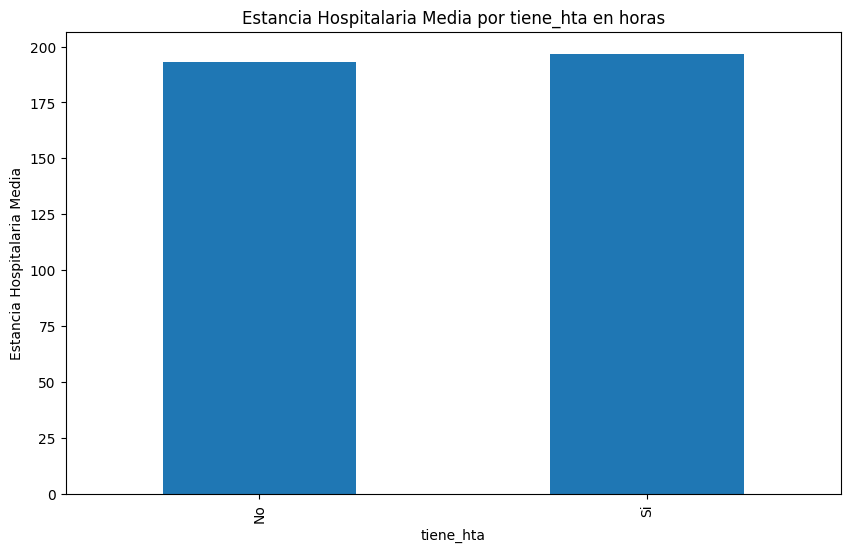

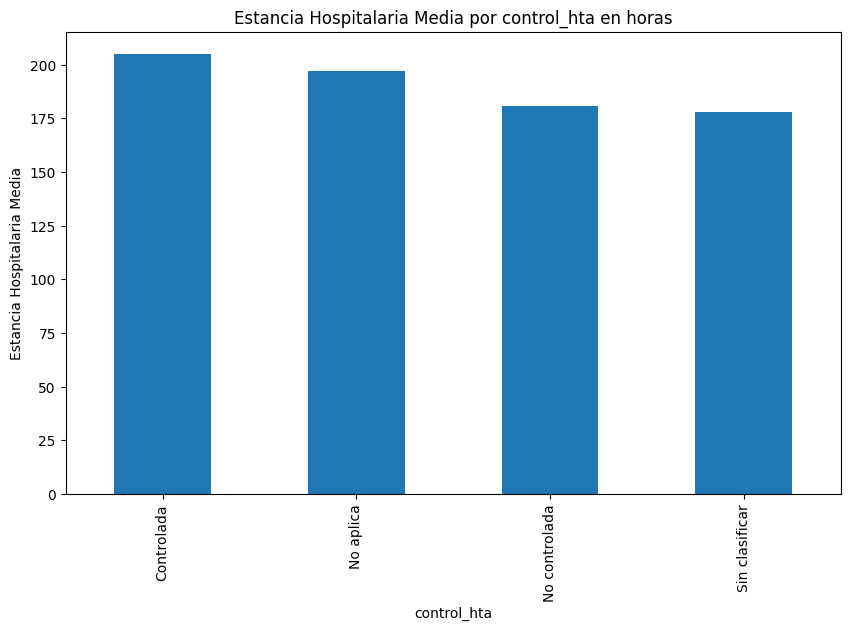

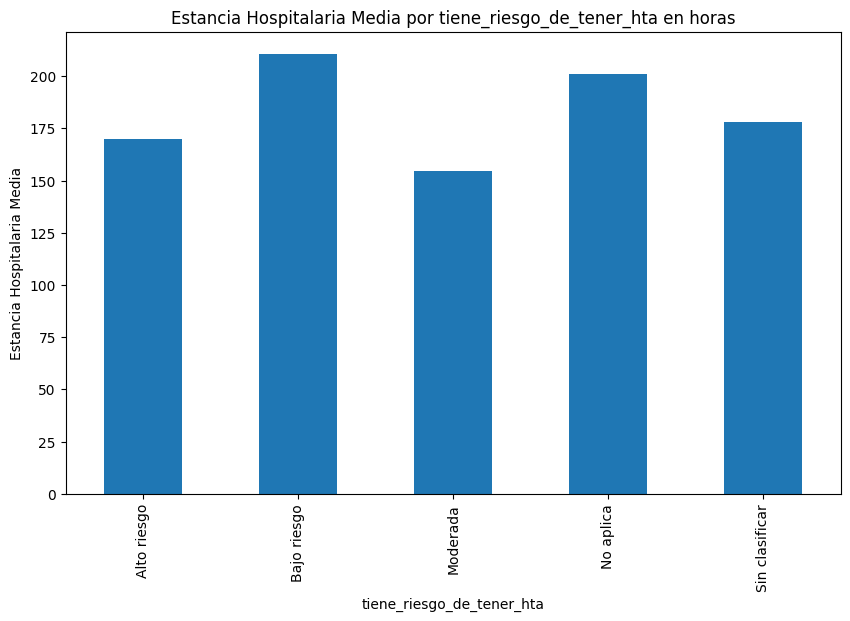

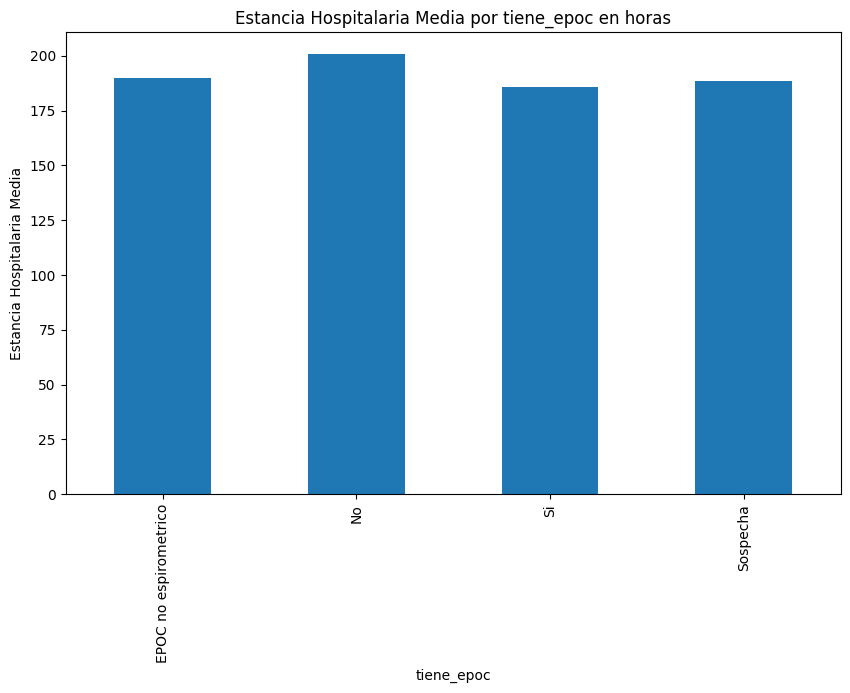

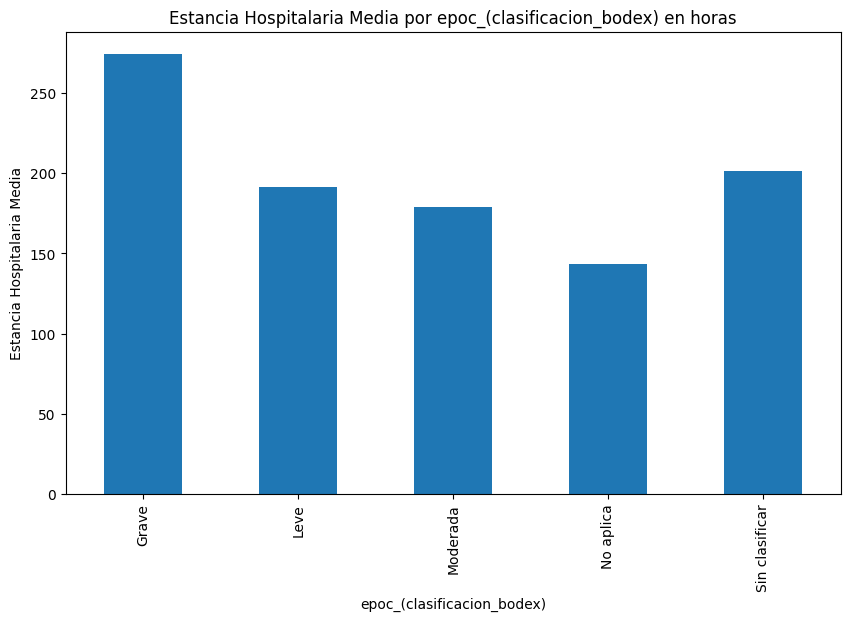

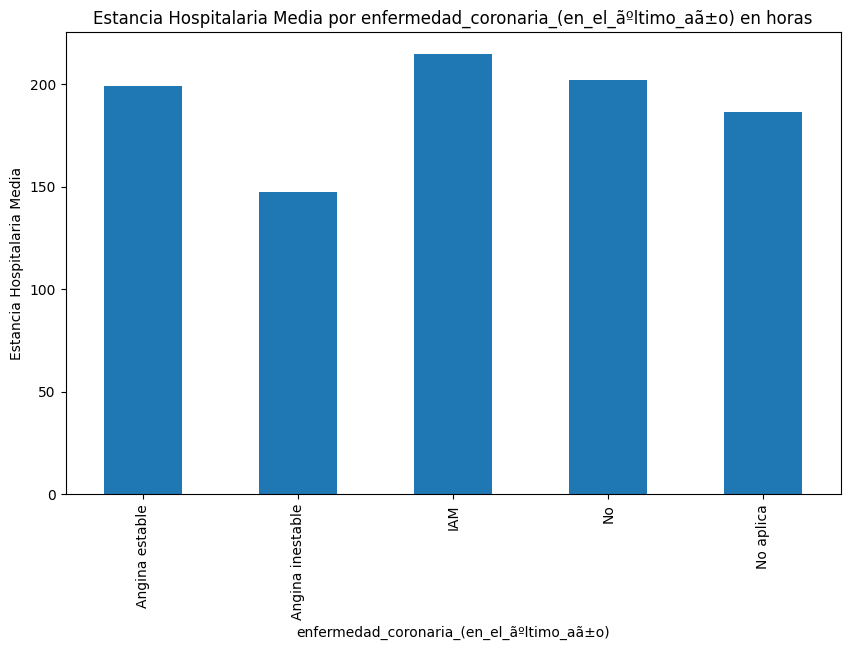

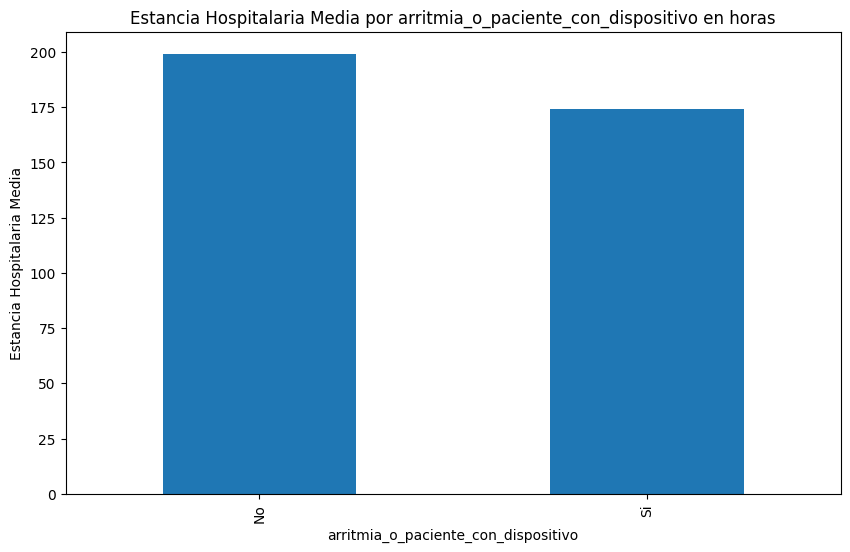

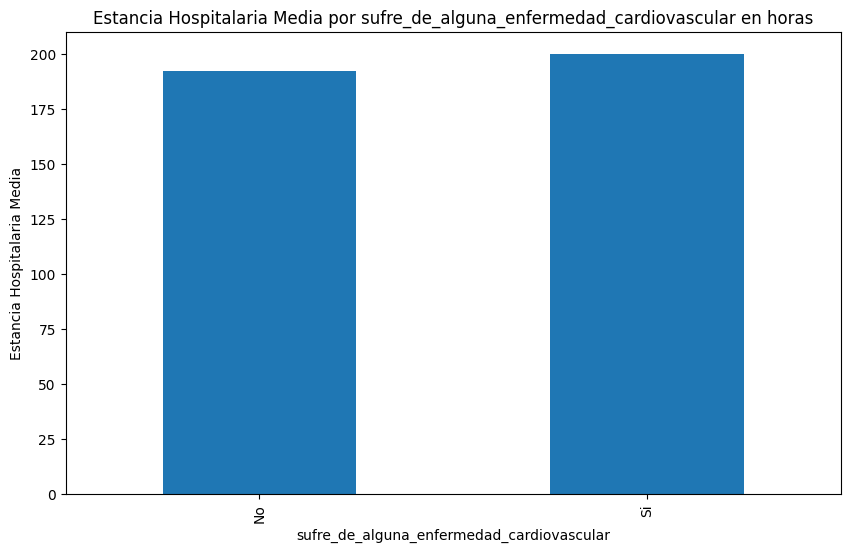

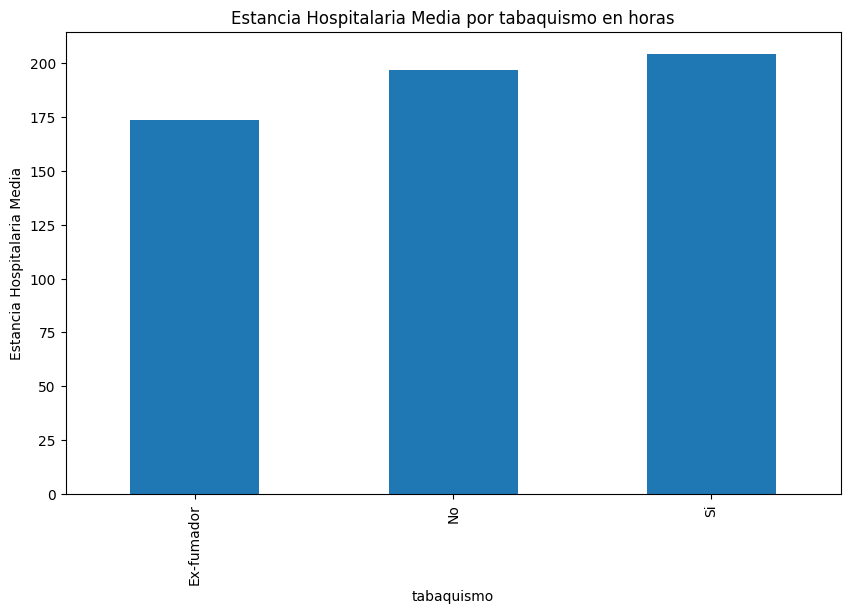

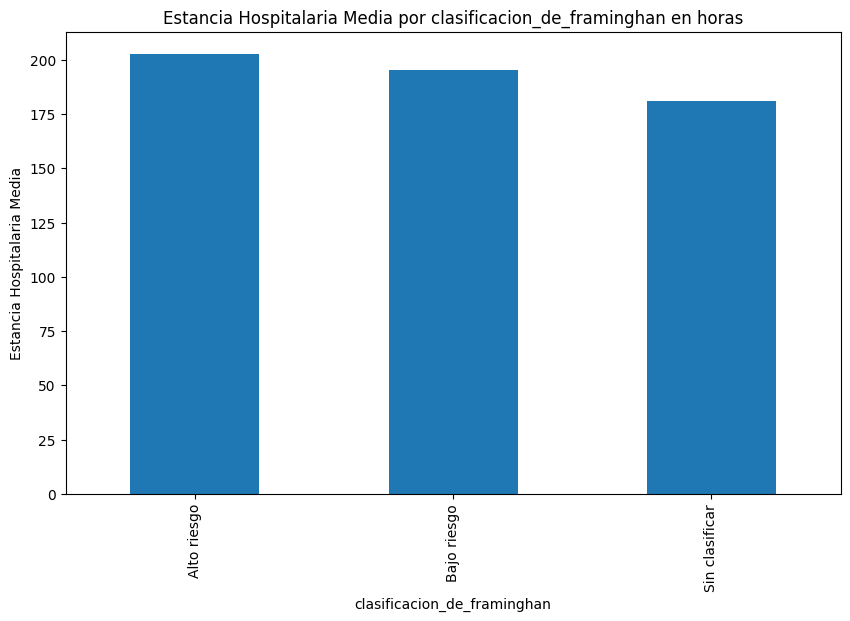

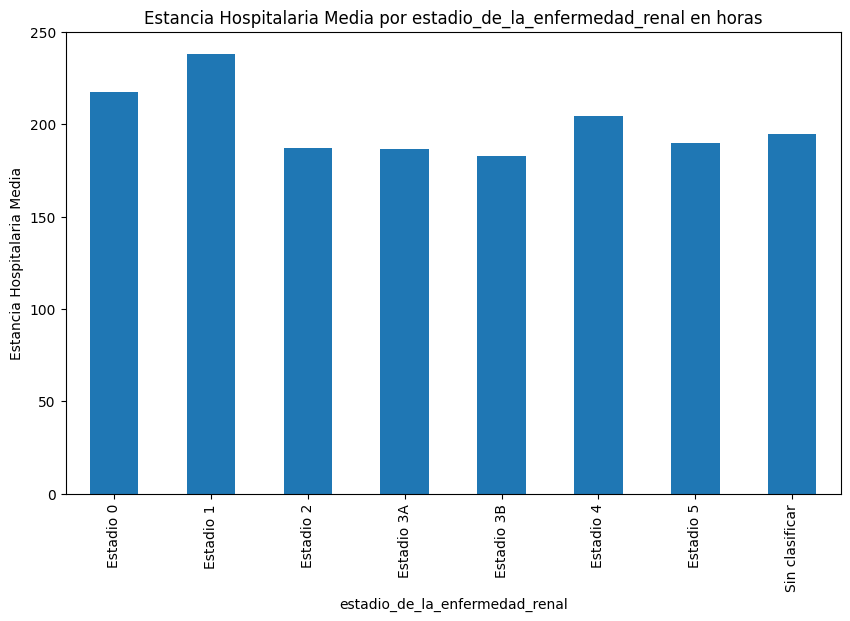

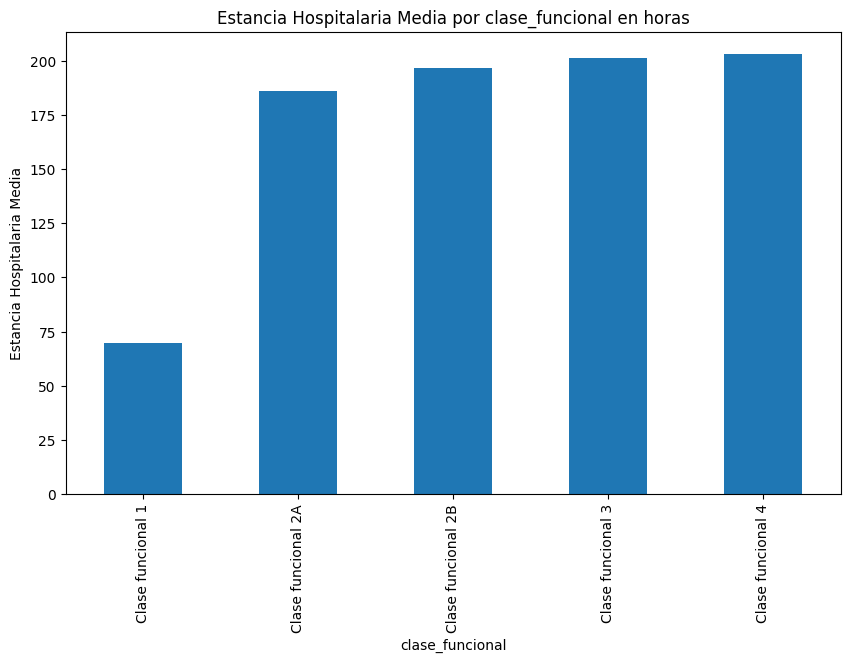

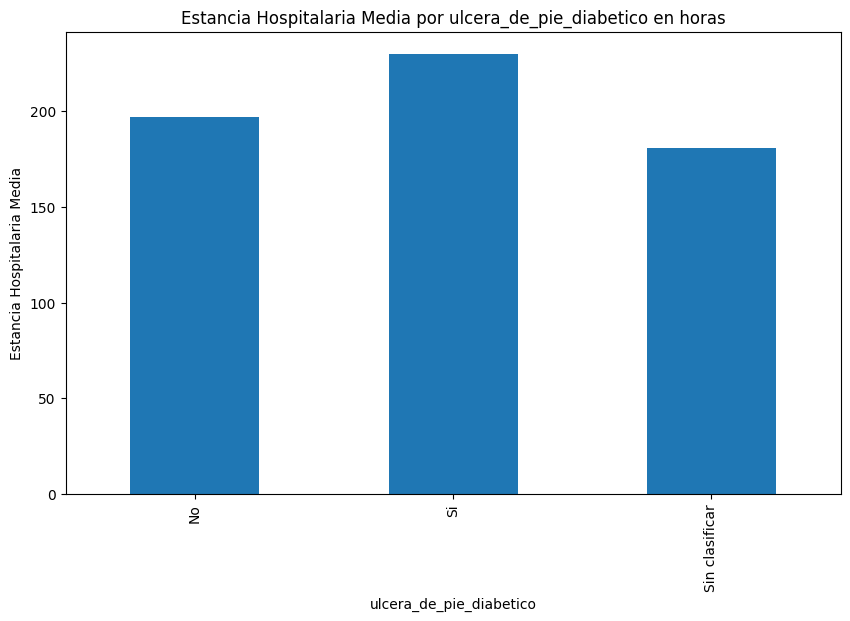

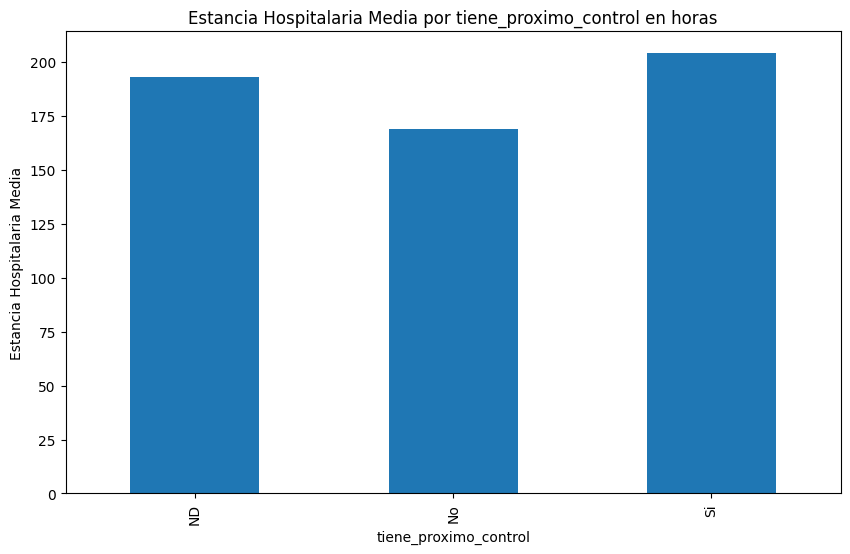

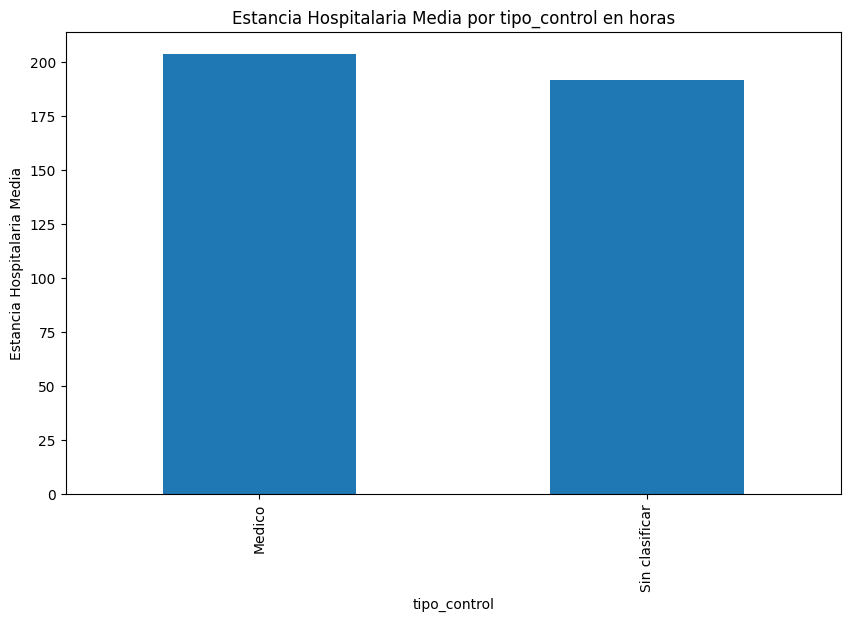

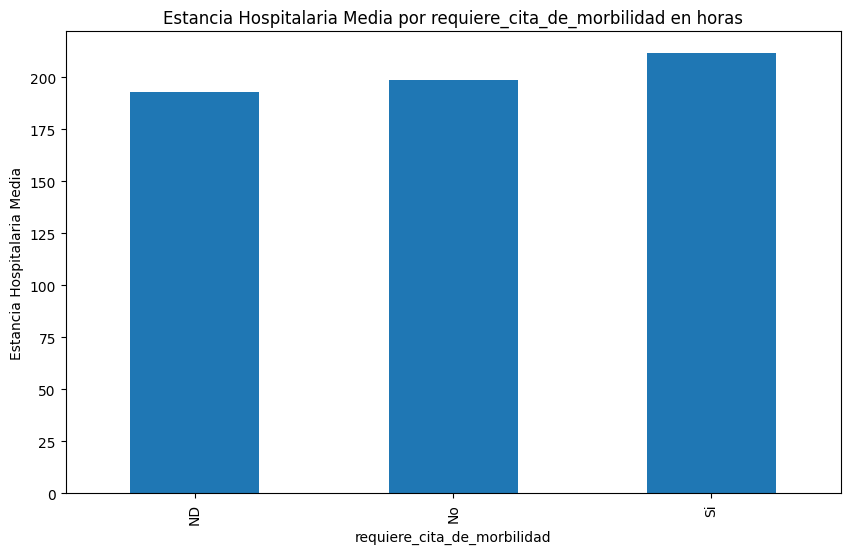

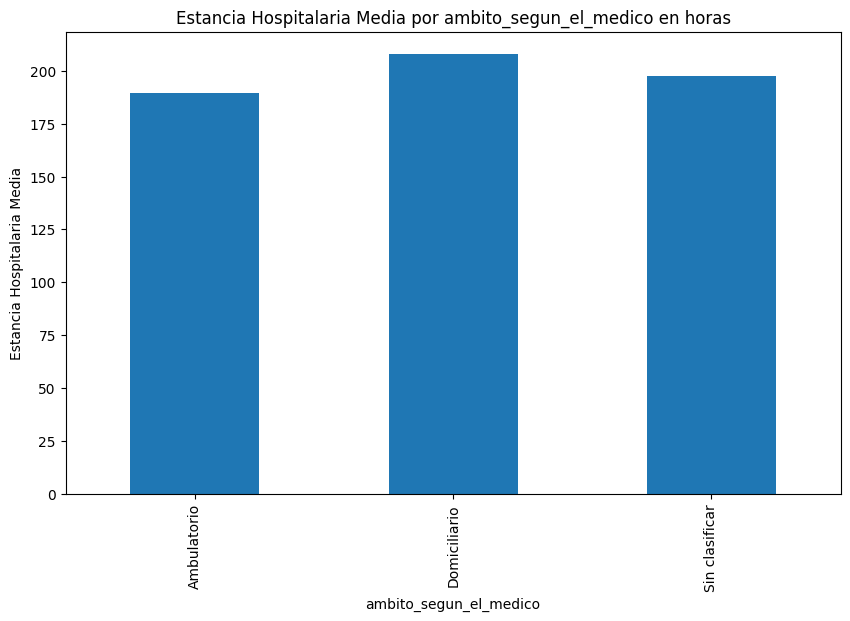

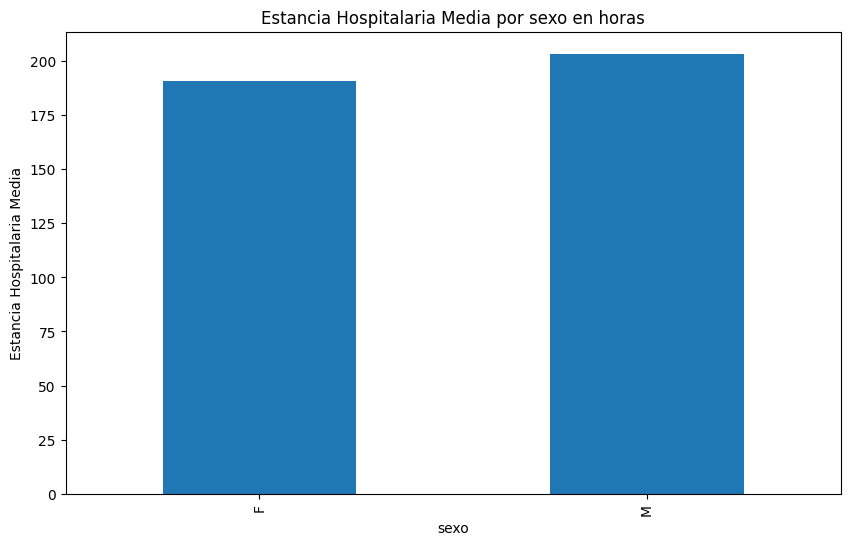

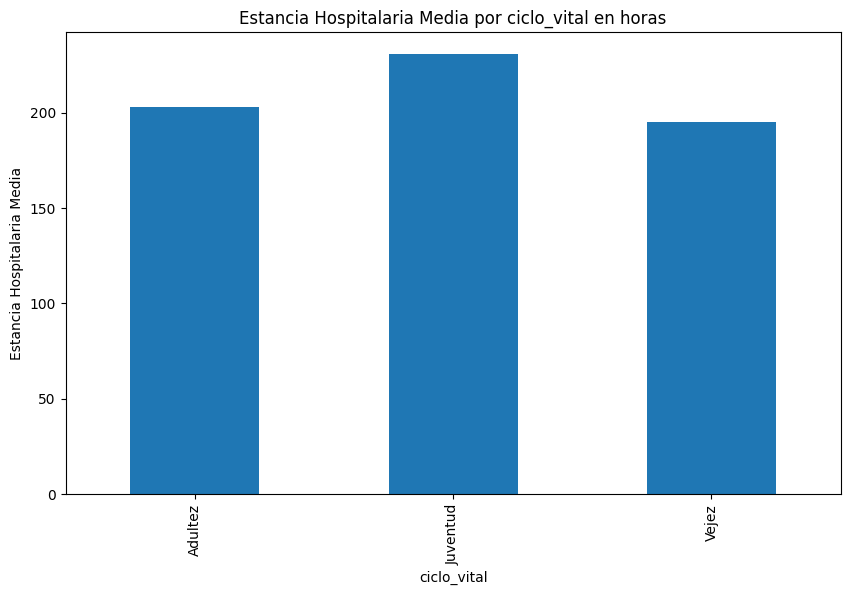

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

df_completo = pd.concat([categoricas, y], axis=1)

# Itera a través de las columnas de 'categoricas' y crea gráficos de barras para cada una
for columna in categoricas.columns:
    resultados = df_completo.groupby(columna)['tiempo_estancia'].mean()
    
    # Crea un gráfico de barras para visualizar los resultados
    resultados.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Estancia Hospitalaria Media por {columna} en horas')
    plt.xlabel(columna)
    plt.ylabel('Estancia Hospitalaria Media')
    plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mayor claridad
    plt.show()

* La estancia hospitalaria, es en promedio similar en las clases funcionales 2A, 2B, 3 y 4. Sin embargo, la clase 3 es un poco más alta que las demás.
* A pesar de que la mayor cantidad de personas pertenecian al ciclo vital jevez, al comparar esta variable con el tiempo de estancia, se observa que la juventud tiene un mayor tiempo de estancia en el hospital, esto quizás se prodría explicar porque los jóvenes son más propensos a tener accidentes graves que necesitan más tiempo de análisis y recuperación. Además la influencia de cierto tipo de enfermedades también determina el tiempo de estancia hospitalaria.
* Las personas que ingresan por via remitido y urgencias, tienen mayor tiempo de estancia hospitalaria.
* El sexo no es tan determinante para el tiempo de estancia hospitalaria, pero los hombres presentan un tiempo un poco mayor en promedio.
* Las personas que fuman y tienen pie diabetico tienden a quedarse más tiempo en el hospital, aunque en los dos casos la diferencia en horas no es tan significativa o marcada.
* La mayoría de personas que estan en el servicio de cuidados intensivos adultos y general adultos, también presentan mayor tiempo de estancia.
* Aunque la mayoría de personas tienen sobrepeso, las que presentan un imc bajo se quedan más tiempo en el hospital.

 # <h1> Gráfico de dispersión para variables numéricas y tiempo de estancia

En este diagrama de dispersión, cada punto representa un paciente en la muestra. 

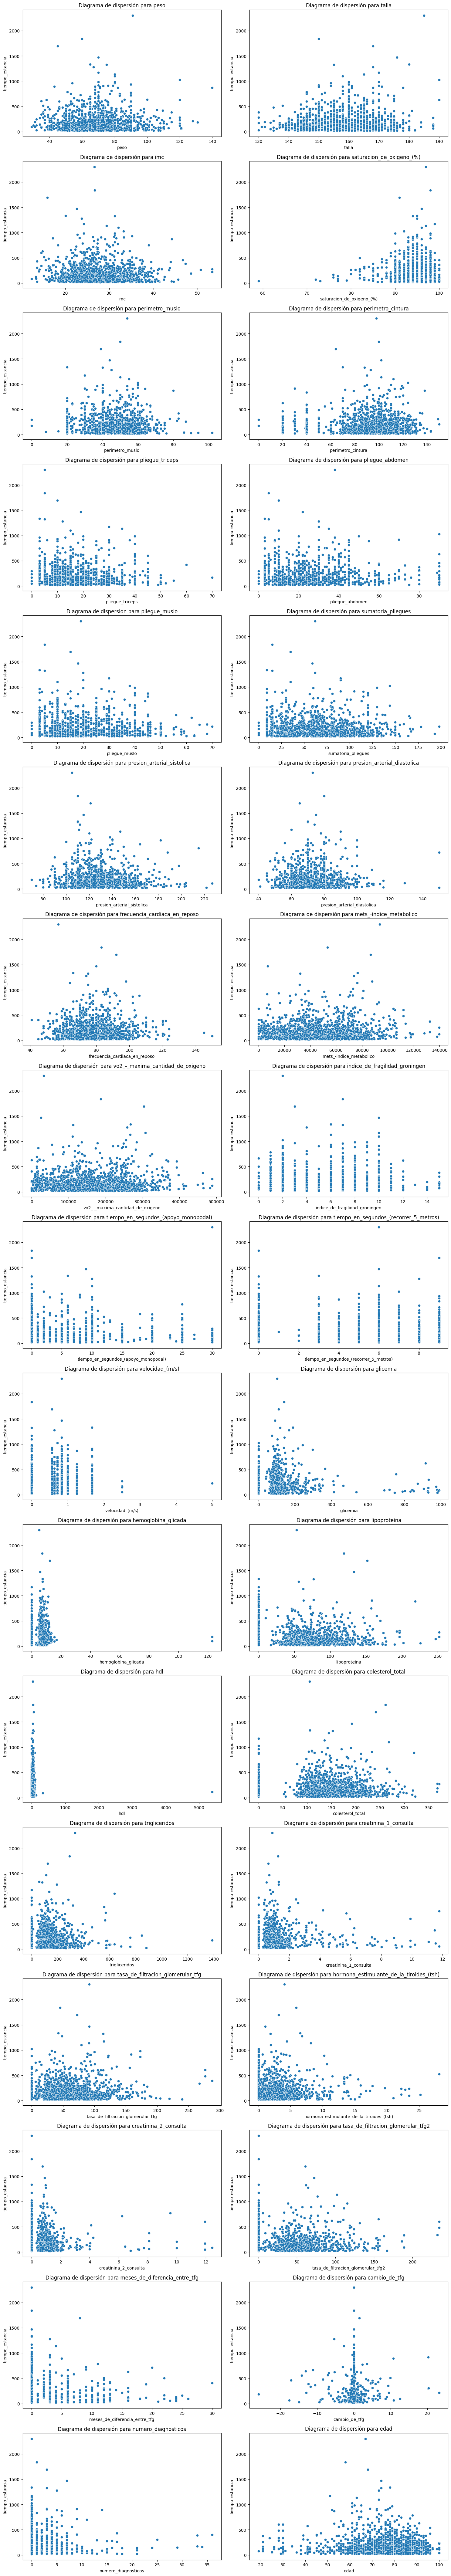

In [51]:
y2 = y.squeeze()
# Tamaño del gráfico
variables_numericas = numericas.columns  # Utiliza todas las variables numéricas

num_plots = len(variables_numericas)
num_plots_per_row = 2  # 2 gráficos por fila

# Calcula el número de filas necesario
num_rows = (num_plots + num_plots_per_row - 1) // num_plots_per_row

# Itera a través de las variables numéricas y crea diagramas de dispersión en subplots
fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))

for i, variable in enumerate(variables_numericas):
    row, col = divmod(i, num_plots_per_row)
    sns.scatterplot(data=numericas, x=variable, y=y2, ax=axs[row, col])
    axs[row, col].set_title(f'Diagrama de dispersión para {variable}')

# Elimina cualquier subplot vacío si el número de gráficos no es un múltiplo exacto de num_plots_per_row
if i < num_plots_per_row - 1:
    for j in range(i + 1, num_plots_per_row):
        fig.delaxes(axs[row, j])

plt.tight_layout()
plt.show()

* En las gráficas anteriores, no se detectaron patrones o tendencias muy marcadas entre las variables y la estancia hospitalaria; sin embargo, algunos de los datos en general tienden a acumularse en la parte inferior de los gráficos y se ven dispersos.
* Además, algunas variables como el número de diagnósticos, meses de diferencia entre tfg, tiempo en recorrer 5 metros y velocidad, presentan concentración de datos en un valor específico.